In [2]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from matplotlib import rcParams
import matplotlib.font_manager as fm
import seaborn as sns
from datetime import datetime
# import arrow

from sklearn import preprocessing


In [3]:
data = pd.read_csv('../data/netflix-rotten-tomatoes-metacritic-imdb.csv')

In [4]:
df = data.copy()
df.head()

,Title,Genre,Tags,Languages,Series or Movie,Hidden Gem Score,Country Availability,Runtime,Director,Writer,...,Netflix Release Date,Production House,Netflix Link,IMDb Link,Summary,IMDb Votes,Image,Poster,TMDb Trailer,Trailer Site
0,Lets Fight Ghost,"Crime, Drama, Fantasy, Horror, Romance","Comedy Programmes,Romantic TV Comedies,Horror ...","Swedish, Spanish",Series,4.3,Thailand,< 30 minutes,Tomas Alfredson,John Ajvide Lindqvist,...,2021-03-04,"Canal+, Sandrew Metronome",https://www.netflix.com/watch/81415947,https://www.imdb.com/title/tt1139797,A med student with a supernatural gift tries t...,205926.0,https://occ-0-4708-64.1.nflxso.net/dnm/api/v6/...,https://m.media-amazon.com/images/M/MV5BOWM4NT...,NaN,NaN
1,HOW TO BUILD A GIRL,Comedy,"Dramas,Comedies,Films Based on Books,British",English,Movie,7.0,Canada,1-2 hour,Coky Giedroyc,Caitlin Moran,...,2021-03-04,"Film 4, Monumental Pictures, Lionsgate",https://www.netflix.com/watch/81041267,https://www.imdb.com/title/tt4193072,"When nerdy Johanna moves to London, things get...",2838.0,https://occ-0-1081-999.1.nflxso.net/dnm/api/v6...,https://m.media-amazon.com/images/M/MV5BZGUyN2...,https://www.youtube.com/watch?v=eIbcxPy4okQ,YouTube
2,Centigrade,"Drama, Thriller",Thrillers,English,Movie,6.4,Canada,1-2 hour,Brendan Walsh,"Brendan Walsh, Daley Nixon",...,2021-03-04,NaN,https://www.netflix.com/watch/81305978,https://www.imdb.com/title/tt8945942,"Trapped in a frozen car during a blizzard, a p...",1720.0,https://occ-0-1081-999.1.nflxso.net/dnm/api/v6...,https://m.media-amazon.com/images/M/MV5BODM2MD...,https://www.youtube.com/watch?v=0RvV7TNUlkQ,YouTube
3,ANNE+,Drama,"TV Dramas,Romantic TV Dramas,Dutch TV Shows",Turkish,Series,7.7,"Belgium,Netherlands",< 30 minutes,NaN,NaN,...,2021-03-04,NaN,https://www.netflix.com/watch/81336456,https://www.imdb.com/title/tt6132758,"Upon moving into a new place, a 20-something r...",1147.0,https://occ-0-1489-1490.1.nflxso.net/dnm/api/v...,https://m.media-amazon.com/images/M/MV5BNWRkMz...,NaN,NaN
4,Moxie,"Animation, Short, Drama","Social Issue Dramas,Teen Movies,Dramas,Comedie...",English,Movie,8.1,"Lithuania,Poland,France,Iceland,Italy,Spain,Gr...",1-2 hour,Stephen Irwin,NaN,...,2021-03-04,NaN,https://www.netflix.com/watch/81078393,https://www.imdb.com/title/tt2023611,Inspired by her moms rebellious past and a con...,63.0,https://occ-0-4039-1500.1.nflxso.net/dnm/api/v...,https://m.media-amazon.com/images/M/MV5BODYyNW...,NaN,NaN


In [5]:
df.iloc[[4],:]

,Title,Genre,Tags,Languages,Series or Movie,Hidden Gem Score,Country Availability,Runtime,Director,Writer,...,Netflix Release Date,Production House,Netflix Link,IMDb Link,Summary,IMDb Votes,Image,Poster,TMDb Trailer,Trailer Site
4,Moxie,"Animation, Short, Drama","Social Issue Dramas,Teen Movies,Dramas,Comedie...",English,Movie,8.1,"Lithuania,Poland,France,Iceland,Italy,Spain,Gr...",1-2 hour,Stephen Irwin,NaN,...,2021-03-04,NaN,https://www.netflix.com/watch/81078393,https://www.imdb.com/title/tt2023611,Inspired by her moms rebellious past and a con...,63.0,https://occ-0-4039-1500.1.nflxso.net/dnm/api/v...,https://m.media-amazon.com/images/M/MV5BODYyNW...,NaN,NaN


In [6]:
# pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)

In [7]:
df.head()

,Title,Genre,Tags,Languages,Series or Movie,Hidden Gem Score,Country Availability,Runtime,Director,Writer,Actors,View Rating,IMDb Score,Rotten Tomatoes Score,Metacritic Score,Awards Received,Awards Nominated For,Boxoffice,Release Date,Netflix Release Date,Production House,Netflix Link,IMDb Link,Summary,IMDb Votes,Image,Poster,TMDb Trailer,Trailer Site
0,Lets Fight Ghost,"Crime, Drama, Fantasy, Horror, Romance","Comedy Programmes,Romantic TV Comedies,Horror ...","Swedish, Spanish",Series,4.3,Thailand,< 30 minutes,Tomas Alfredson,John Ajvide Lindqvist,"Kåre Hedebrant, Per Ragnar, Lina Leandersson, ...",R,7.9,98.0,82.0,74.0,57.0,"$2,122,065",12 Dec 2008,2021-03-04,"Canal+, Sandrew Metronome",https://www.netflix.com/watch/81415947,https://www.imdb.com/title/tt1139797,A med student with a supernatural gift tries t...,205926.0,https://occ-0-4708-64.1.nflxso.net/dnm/api/v6/...,https://m.media-amazon.com/images/M/MV5BOWM4NT...,NaN,NaN
1,HOW TO BUILD A GIRL,Comedy,"Dramas,Comedies,Films Based on Books,British",English,Movie,7.0,Canada,1-2 hour,Coky Giedroyc,Caitlin Moran,"Paddy Considine, Cleo, Beanie Feldstein, Dónal...",R,5.8,79.0,69.0,1.0,NaN,"$70,632",08 May 2020,2021-03-04,"Film 4, Monumental Pictures, Lionsgate",https://www.netflix.com/watch/81041267,https://www.imdb.com/title/tt4193072,"When nerdy Johanna moves to London, things get...",2838.0,https://occ-0-1081-999.1.nflxso.net/dnm/api/v6...,https://m.media-amazon.com/images/M/MV5BZGUyN2...,https://www.youtube.com/watch?v=eIbcxPy4okQ,YouTube
2,Centigrade,"Drama, Thriller",Thrillers,English,Movie,6.4,Canada,1-2 hour,Brendan Walsh,"Brendan Walsh, Daley Nixon","Genesis Rodriguez, Vincent Piazza",Unrated,4.3,NaN,46.0,NaN,NaN,"$16,263",28 Aug 2020,2021-03-04,NaN,https://www.netflix.com/watch/81305978,https://www.imdb.com/title/tt8945942,"Trapped in a frozen car during a blizzard, a p...",1720.0,https://occ-0-1081-999.1.nflxso.net/dnm/api/v6...,https://m.media-amazon.com/images/M/MV5BODM2MD...,https://www.youtube.com/watch?v=0RvV7TNUlkQ,YouTube
3,ANNE+,Drama,"TV Dramas,Romantic TV Dramas,Dutch TV Shows",Turkish,Series,7.7,"Belgium,Netherlands",< 30 minutes,NaN,NaN,"Vahide Perçin, Gonca Vuslateri, Cansu Dere, Be...",NaN,6.5,NaN,NaN,1.0,NaN,NaN,01 Oct 2016,2021-03-04,NaN,https://www.netflix.com/watch/81336456,https://www.imdb.com/title/tt6132758,"Upon moving into a new place, a 20-something r...",1147.0,https://occ-0-1489-1490.1.nflxso.net/dnm/api/v...,https://m.media-amazon.com/images/M/MV5BNWRkMz...,NaN,NaN
4,Moxie,"Animation, Short, Drama","Social Issue Dramas,Teen Movies,Dramas,Comedie...",English,Movie,8.1,"Lithuania,Poland,France,Iceland,Italy,Spain,Gr...",1-2 hour,Stephen Irwin,NaN,Ragga Gudrun,NaN,6.3,NaN,NaN,NaN,4.0,NaN,22 Sep 2011,2021-03-04,NaN,https://www.netflix.com/watch/81078393,https://www.imdb.com/title/tt2023611,Inspired by her moms rebellious past and a con...,63.0,https://occ-0-4039-1500.1.nflxso.net/dnm/api/v...,https://m.media-amazon.com/images/M/MV5BODYyNW...,NaN,NaN


In [8]:
pd.reset_option('display.max_colwidth')
pd.reset_option('display.max_columns')
df.head()

,Title,Genre,Tags,Languages,Series or Movie,Hidden Gem Score,Country Availability,Runtime,Director,Writer,Actors,View Rating,IMDb Score,Rotten Tomatoes Score,Metacritic Score,Awards Received,Awards Nominated For,Boxoffice,Release Date,Netflix Release Date,Production House,Netflix Link,IMDb Link,Summary,IMDb Votes,Image,Poster,TMDb Trailer,Trailer Site
0,Lets Fight Ghost,"Crime, Drama, Fantasy, Horror, Romance","Comedy Programmes,Romantic TV Comedies,Horror ...","Swedish, Spanish",Series,4.3,Thailand,< 30 minutes,Tomas Alfredson,John Ajvide Lindqvist,"Kåre Hedebrant, Per Ragnar, Lina Leandersson, ...",R,7.9,98.0,82.0,74.0,57.0,"$2,122,065",12 Dec 2008,2021-03-04,"Canal+, Sandrew Metronome",https://www.netflix.com/watch/81415947,https://www.imdb.com/title/tt1139797,A med student with a supernatural gift tries t...,205926.0,https://occ-0-4708-64.1.nflxso.net/dnm/api/v6/...,https://m.media-amazon.com/images/M/MV5BOWM4NT...,NaN,NaN
1,HOW TO BUILD A GIRL,Comedy,"Dramas,Comedies,Films Based on Books,British",English,Movie,7.0,Canada,1-2 hour,Coky Giedroyc,Caitlin Moran,"Paddy Considine, Cleo, Beanie Feldstein, Dónal...",R,5.8,79.0,69.0,1.0,NaN,"$70,632",08 May 2020,2021-03-04,"Film 4, Monumental Pictures, Lionsgate",https://www.netflix.com/watch/81041267,https://www.imdb.com/title/tt4193072,"When nerdy Johanna moves to London, things get...",2838.0,https://occ-0-1081-999.1.nflxso.net/dnm/api/v6...,https://m.media-amazon.com/images/M/MV5BZGUyN2...,https://www.youtube.com/watch?v=eIbcxPy4okQ,YouTube
2,Centigrade,"Drama, Thriller",Thrillers,English,Movie,6.4,Canada,1-2 hour,Brendan Walsh,"Brendan Walsh, Daley Nixon","Genesis Rodriguez, Vincent Piazza",Unrated,4.3,NaN,46.0,NaN,NaN,"$16,263",28 Aug 2020,2021-03-04,NaN,https://www.netflix.com/watch/81305978,https://www.imdb.com/title/tt8945942,"Trapped in a frozen car during a blizzard, a p...",1720.0,https://occ-0-1081-999.1.nflxso.net/dnm/api/v6...,https://m.media-amazon.com/images/M/MV5BODM2MD...,https://www.youtube.com/watch?v=0RvV7TNUlkQ,YouTube
3,ANNE+,Drama,"TV Dramas,Romantic TV Dramas,Dutch TV Shows",Turkish,Series,7.7,"Belgium,Netherlands",< 30 minutes,NaN,NaN,"Vahide Perçin, Gonca Vuslateri, Cansu Dere, Be...",NaN,6.5,NaN,NaN,1.0,NaN,NaN,01 Oct 2016,2021-03-04,NaN,https://www.netflix.com/watch/81336456,https://www.imdb.com/title/tt6132758,"Upon moving into a new place, a 20-something r...",1147.0,https://occ-0-1489-1490.1.nflxso.net/dnm/api/v...,https://m.media-amazon.com/images/M/MV5BNWRkMz...,NaN,NaN
4,Moxie,"Animation, Short, Drama","Social Issue Dramas,Teen Movies,Dramas,Comedie...",English,Movie,8.1,"Lithuania,Poland,France,Iceland,Italy,Spain,Gr...",1-2 hour,Stephen Irwin,NaN,Ragga Gudrun,NaN,6.3,NaN,NaN,NaN,4.0,NaN,22 Sep 2011,2021-03-04,NaN,https://www.netflix.com/watch/81078393,https://www.imdb.com/title/tt2023611,Inspired by her moms rebellious past and a con...,63.0,https://occ-0-4039-1500.1.nflxso.net/dnm/api/v...,https://m.media-amazon.com/images/M/MV5BODYyNW...,NaN,NaN


In [9]:
df.groupby('Series or Movie').count()

,Title,Genre,Tags,Languages,Hidden Gem Score,Country Availability,Runtime,Director,Writer,Actors,View Rating,IMDb Score,Rotten Tomatoes Score,Metacritic Score,Awards Received,Awards Nominated For,Boxoffice,Release Date,Netflix Release Date,Production House,Netflix Link,IMDb Link,Summary,IMDb Votes,Image,Poster,TMDb Trailer,Trailer Site
Series or Movie,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Movie,11697,10514,11648,10416,10275,11682,11697,10269,9767,10386,6670,10276,6199,4250,4967,6199,3922,10327,11697,5020,11697,10185,11689,10275,11697,9349,7194,7194
Series,3783,3256,3765,3129,3104,3779,3782,503,1383,3169,1786,3105,183,86,1108,1462,85,3046,3783,129,3783,2992,3782,3104,3783,2493,0,0


In [10]:
print(df.shape)
df.isna().sum()

(15480, 29)


Title                        0
Genre                     1710
Tags                        67
Languages                 1935
Series or Movie              0
Hidden Gem Score          2101
Country Availability        19
Runtime                      1
Director                  4708
Writer                    4330
Actors                    1925
View Rating               7024
IMDb Score                2099
Rotten Tomatoes Score     9098
Metacritic Score         11144
Awards Received           9405
Awards Nominated For      7819
Boxoffice                11473
Release Date              2107
Netflix Release Date         0
Production House         10331
Netflix Link                 0
IMDb Link                 2303
Summary                      9
IMDb Votes                2101
Image                        0
Poster                    3638
TMDb Trailer              8286
Trailer Site              8286
dtype: int64

### Language Columns Needs Preprocessing, Too!!

In [11]:
print(df['Languages'].unique())
df['Languages'].value_counts()

['Swedish, Spanish' 'English' 'Turkish' ...
 'English, French, Tibetan, Mandarin, Russian, Hindi, Portuguese, Latin, Italian, Spanish'
 'English, Ibo, Yoruba, Hausa' 'English, Hawaiian, Mandarin']


English                        5133
Japanese                       1213
Korean                          541
Spanish                         382
Hindi                           329
                               ... 
Hungarian, French, English        1
Arabic, Nyanja, English           1
Dutch, Flemish                    1
Thai, Japanese                    1
English, Hawaiian, Mandarin       1
Name: Languages, Length: 1438, dtype: int64

In [12]:
df['Poster'][0]

'https://m.media-amazon.com/images/M/MV5BOWM4NTY2NTMtZDZlZS00NTgyLWEzZDMtODE3ZGI1MzI3ZmU5XkEyXkFqcGdeQXVyNzI1NzMxNzM@._V1_SX300.jpg'

In [13]:
df['Image'][0]

'https://occ-0-4708-64.1.nflxso.net/dnm/api/v6/evlCitJPPCVCry0BZlEFb5-QjKc/AAAABcmgLCxN8dNahdY2kgd1hhcL2a6XrE92x24Bx5h6JFUvH5zMrv6lFWl_aWMt33b6DHvkgsUeDx_8Q1rmopwT3fuF8Rq3S1hrkvFf3uzVv2sb3zrtU-LM1Zy1FfrAKD3nKNyA_RQWrmw.jpg?r=cd0'

In [14]:
your_list = list()
df.iloc[0,1].replace(' ','').lower().split(',')

['crime', 'drama', 'fantasy', 'horror', 'romance']

In [15]:
df.iloc[0,1]

'Crime, Drama, Fantasy, Horror, Romance'

In [16]:
np.array(your_list).flatten().tolist()

[]

In [17]:
df[df['Languages'] == 'Korean'].groupby('Genre').count()

,Title,Tags,Languages,Series or Movie,Hidden Gem Score,Country Availability,Runtime,Director,Writer,Actors,View Rating,IMDb Score,Rotten Tomatoes Score,Metacritic Score,Awards Received,Awards Nominated For,Boxoffice,Release Date,Netflix Release Date,Production House,Netflix Link,IMDb Link,Summary,IMDb Votes,Image,Poster,TMDb Trailer,Trailer Site
Genre,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Action,5,5,5,5,5,5,5,5,4,5,3,5,4,1,4,3,2,5,5,1,5,5,5,5,5,5,4,4
"Action, Adventure, Comedy, Fantasy, History",1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,0,1,1,0,1,1,1,1,1,1,1,1
"Action, Comedy",7,7,7,7,7,7,7,7,6,7,2,7,4,0,4,3,0,7,7,0,7,7,7,7,7,7,4,4
"Action, Comedy, Crime",4,4,4,4,3,4,4,4,4,4,1,3,2,0,2,2,1,4,4,1,4,3,4,3,4,3,0,0
"Action, Comedy, Crime, Drama",2,2,2,2,2,2,2,1,1,2,1,2,1,0,2,2,0,2,2,0,2,2,2,2,2,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Romance,6,6,6,6,6,6,6,0,0,6,0,6,0,0,2,1,0,6,6,0,6,4,6,6,6,3,0,0
"Sci-Fi, Thriller",1,1,1,1,1,1,1,1,1,1,0,1,1,0,0,0,0,1,1,0,1,1,1,1,1,1,1,1
"Short, Drama",1,1,1,1,0,1,1,1,1,1,0,0,0,0,1,0,0,1,1,0,1,1,1,0,1,0,0,0


In [18]:
df[df['Title']  == 'Chihayafuru']

,Title,Genre,Tags,Languages,Series or Movie,Hidden Gem Score,Country Availability,Runtime,Director,Writer,Actors,View Rating,IMDb Score,Rotten Tomatoes Score,Metacritic Score,Awards Received,Awards Nominated For,Boxoffice,Release Date,Netflix Release Date,Production House,Netflix Link,IMDb Link,Summary,IMDb Votes,Image,Poster,TMDb Trailer,Trailer Site
112,Chihayafuru,"Animation, Comedy, Drama","Drama Anime,Anime Series,Teen TV Shows,Japanes...",Japanese,Series,8.6,South Korea,< 30 minutes,NaN,NaN,"Asami Seto, Ai Kayano, Mamoru Miyano, Tôru Nara",TV-14,8.2,NaN,NaN,NaN,1.0,NaN,05 Oct 2011,2021-02-21,NaN,https://www.netflix.com/watch/81403566,https://www.imdb.com/title/tt2150751,"With guts and determination, high school stude...",965.0,https://occ-0-1361-988.1.nflxso.net/dnm/api/v6...,https://m.media-amazon.com/images/M/MV5BNDBhND...,NaN,NaN


In [19]:
df[df['Series or Movie'] == 'Series'].count()

Title                    3783
Genre                    3256
Tags                     3765
Languages                3129
Series or Movie          3783
Hidden Gem Score         3104
Country Availability     3779
Runtime                  3782
Director                  503
Writer                   1383
Actors                   3169
View Rating              1786
IMDb Score               3105
Rotten Tomatoes Score     183
Metacritic Score           86
Awards Received          1108
Awards Nominated For     1462
Boxoffice                  85
Release Date             3046
Netflix Release Date     3783
Production House          129
Netflix Link             3783
IMDb Link                2992
Summary                  3782
IMDb Votes               3104
Image                    3783
Poster                   2493
TMDb Trailer                0
Trailer Site                0
dtype: int64

# Genre_List 정규화
- 띄어쓰기 없애기
- lower

In [20]:
genre_before_rg = df['Genre']
reg_genre = []

for i in range(len(genre_before_rg)):
    try:
        target = df.iloc[i,1].replace(' ','').lower().split(',')
        reg_genre.append(target)

#         print(target)
    except:
        reg_genre.append([])

In [21]:
reg_genre

[['crime', 'drama', 'fantasy', 'horror', 'romance'],
 ['comedy'],
 ['drama', 'thriller'],
 ['drama'],
 ['animation', 'short', 'drama'],
 ['comedy', 'romance'],
 ['drama'],
 ['crime'],
 ['drama'],
 ['comedy'],
 ['comedy', 'family', 'fantasy'],
 ['crime', 'drama', 'fantasy', 'mystery', 'thriller'],
 ['drama'],
 ['comedy', 'drama'],
 ['short', 'drama'],
 ['crime', 'drama', 'thriller'],
 ['action', 'adventure', 'fantasy', 'sci-fi'],
 ['adventure', 'drama', 'fantasy', 'mystery'],
 ['music'],
 ['drama', 'thriller'],
 ['short'],
 ['thriller'],
 ['drama'],
 ['animation', 'action', 'comedy'],
 ['comedy', 'drama'],
 ['crime', 'drama'],
 ['drama', 'sci-fi'],
 ['drama', 'romance'],
 ['comedy'],
 ['action', 'family', 'sci-fi', 'thriller'],
 ['biography', 'drama', 'thriller'],
 ['drama'],
 ['crime', 'drama'],
 ['drama'],
 ['drama'],
 ['action', 'family', 'sci-fi', 'thriller'],
 ['drama'],
 ['drama', 'romance'],
 ['animation', 'drama', 'sport'],
 [],
 ['drama', 'romance'],
 ['biography', 'drama'],
 [

In [22]:
genre_list_df = df.copy()

In [23]:
genre_list_df.insert(2, 'Genre_List', reg_genre)

In [24]:
genre_list_df['Genre_List'][0][0]

'crime'

In [25]:
genre_list_df.head()

,Title,Genre,Genre_List,Tags,Languages,Series or Movie,Hidden Gem Score,Country Availability,Runtime,Director,Writer,Actors,View Rating,IMDb Score,Rotten Tomatoes Score,Metacritic Score,Awards Received,Awards Nominated For,Boxoffice,Release Date,Netflix Release Date,Production House,Netflix Link,IMDb Link,Summary,IMDb Votes,Image,Poster,TMDb Trailer,Trailer Site
0,Lets Fight Ghost,"Crime, Drama, Fantasy, Horror, Romance","[crime, drama, fantasy, horror, romance]","Comedy Programmes,Romantic TV Comedies,Horror ...","Swedish, Spanish",Series,4.3,Thailand,< 30 minutes,Tomas Alfredson,John Ajvide Lindqvist,"Kåre Hedebrant, Per Ragnar, Lina Leandersson, ...",R,7.9,98.0,82.0,74.0,57.0,"$2,122,065",12 Dec 2008,2021-03-04,"Canal+, Sandrew Metronome",https://www.netflix.com/watch/81415947,https://www.imdb.com/title/tt1139797,A med student with a supernatural gift tries t...,205926.0,https://occ-0-4708-64.1.nflxso.net/dnm/api/v6/...,https://m.media-amazon.com/images/M/MV5BOWM4NT...,NaN,NaN
1,HOW TO BUILD A GIRL,Comedy,[comedy],"Dramas,Comedies,Films Based on Books,British",English,Movie,7.0,Canada,1-2 hour,Coky Giedroyc,Caitlin Moran,"Paddy Considine, Cleo, Beanie Feldstein, Dónal...",R,5.8,79.0,69.0,1.0,NaN,"$70,632",08 May 2020,2021-03-04,"Film 4, Monumental Pictures, Lionsgate",https://www.netflix.com/watch/81041267,https://www.imdb.com/title/tt4193072,"When nerdy Johanna moves to London, things get...",2838.0,https://occ-0-1081-999.1.nflxso.net/dnm/api/v6...,https://m.media-amazon.com/images/M/MV5BZGUyN2...,https://www.youtube.com/watch?v=eIbcxPy4okQ,YouTube
2,Centigrade,"Drama, Thriller","[drama, thriller]",Thrillers,English,Movie,6.4,Canada,1-2 hour,Brendan Walsh,"Brendan Walsh, Daley Nixon","Genesis Rodriguez, Vincent Piazza",Unrated,4.3,NaN,46.0,NaN,NaN,"$16,263",28 Aug 2020,2021-03-04,NaN,https://www.netflix.com/watch/81305978,https://www.imdb.com/title/tt8945942,"Trapped in a frozen car during a blizzard, a p...",1720.0,https://occ-0-1081-999.1.nflxso.net/dnm/api/v6...,https://m.media-amazon.com/images/M/MV5BODM2MD...,https://www.youtube.com/watch?v=0RvV7TNUlkQ,YouTube
3,ANNE+,Drama,[drama],"TV Dramas,Romantic TV Dramas,Dutch TV Shows",Turkish,Series,7.7,"Belgium,Netherlands",< 30 minutes,NaN,NaN,"Vahide Perçin, Gonca Vuslateri, Cansu Dere, Be...",NaN,6.5,NaN,NaN,1.0,NaN,NaN,01 Oct 2016,2021-03-04,NaN,https://www.netflix.com/watch/81336456,https://www.imdb.com/title/tt6132758,"Upon moving into a new place, a 20-something r...",1147.0,https://occ-0-1489-1490.1.nflxso.net/dnm/api/v...,https://m.media-amazon.com/images/M/MV5BNWRkMz...,NaN,NaN
4,Moxie,"Animation, Short, Drama","[animation, short, drama]","Social Issue Dramas,Teen Movies,Dramas,Comedie...",English,Movie,8.1,"Lithuania,Poland,France,Iceland,Italy,Spain,Gr...",1-2 hour,Stephen Irwin,NaN,Ragga Gudrun,NaN,6.3,NaN,NaN,NaN,4.0,NaN,22 Sep 2011,2021-03-04,NaN,https://www.netflix.com/watch/81078393,https://www.imdb.com/title/tt2023611,Inspired by her moms rebellious past and a con...,63.0,https://occ-0-4039-1500.1.nflxso.net/dnm/api/v...,https://m.media-amazon.com/images/M/MV5BODYyNW...,NaN,NaN


# Title 정규화 

In [26]:
title_before_rg = df['Title'].values.tolist()

In [27]:
reg_title = []

for i in title_before_rg:
    text = re.sub('[^a-zA-Z0-9가-힣~!@#$%^&*()_+`\-\=/.,"\']',' ',i).strip()
    reg_title.append(text)
#     reg_title.append(text.lower())


In [28]:
genre_list_df = genre_list_df.drop(['Title'],axis=1)

In [29]:
title_list_df = genre_list_df.copy()

In [30]:
title_list_df.insert(0, 'Title', reg_title)

In [31]:
title_list_df.head()

,Title,Genre,Genre_List,Tags,Languages,Series or Movie,Hidden Gem Score,Country Availability,Runtime,Director,Writer,Actors,View Rating,IMDb Score,Rotten Tomatoes Score,Metacritic Score,Awards Received,Awards Nominated For,Boxoffice,Release Date,Netflix Release Date,Production House,Netflix Link,IMDb Link,Summary,IMDb Votes,Image,Poster,TMDb Trailer,Trailer Site
0,Lets Fight Ghost,"Crime, Drama, Fantasy, Horror, Romance","[crime, drama, fantasy, horror, romance]","Comedy Programmes,Romantic TV Comedies,Horror ...","Swedish, Spanish",Series,4.3,Thailand,< 30 minutes,Tomas Alfredson,John Ajvide Lindqvist,"Kåre Hedebrant, Per Ragnar, Lina Leandersson, ...",R,7.9,98.0,82.0,74.0,57.0,"$2,122,065",12 Dec 2008,2021-03-04,"Canal+, Sandrew Metronome",https://www.netflix.com/watch/81415947,https://www.imdb.com/title/tt1139797,A med student with a supernatural gift tries t...,205926.0,https://occ-0-4708-64.1.nflxso.net/dnm/api/v6/...,https://m.media-amazon.com/images/M/MV5BOWM4NT...,NaN,NaN
1,HOW TO BUILD A GIRL,Comedy,[comedy],"Dramas,Comedies,Films Based on Books,British",English,Movie,7.0,Canada,1-2 hour,Coky Giedroyc,Caitlin Moran,"Paddy Considine, Cleo, Beanie Feldstein, Dónal...",R,5.8,79.0,69.0,1.0,NaN,"$70,632",08 May 2020,2021-03-04,"Film 4, Monumental Pictures, Lionsgate",https://www.netflix.com/watch/81041267,https://www.imdb.com/title/tt4193072,"When nerdy Johanna moves to London, things get...",2838.0,https://occ-0-1081-999.1.nflxso.net/dnm/api/v6...,https://m.media-amazon.com/images/M/MV5BZGUyN2...,https://www.youtube.com/watch?v=eIbcxPy4okQ,YouTube
2,Centigrade,"Drama, Thriller","[drama, thriller]",Thrillers,English,Movie,6.4,Canada,1-2 hour,Brendan Walsh,"Brendan Walsh, Daley Nixon","Genesis Rodriguez, Vincent Piazza",Unrated,4.3,NaN,46.0,NaN,NaN,"$16,263",28 Aug 2020,2021-03-04,NaN,https://www.netflix.com/watch/81305978,https://www.imdb.com/title/tt8945942,"Trapped in a frozen car during a blizzard, a p...",1720.0,https://occ-0-1081-999.1.nflxso.net/dnm/api/v6...,https://m.media-amazon.com/images/M/MV5BODM2MD...,https://www.youtube.com/watch?v=0RvV7TNUlkQ,YouTube
3,ANNE+,Drama,[drama],"TV Dramas,Romantic TV Dramas,Dutch TV Shows",Turkish,Series,7.7,"Belgium,Netherlands",< 30 minutes,NaN,NaN,"Vahide Perçin, Gonca Vuslateri, Cansu Dere, Be...",NaN,6.5,NaN,NaN,1.0,NaN,NaN,01 Oct 2016,2021-03-04,NaN,https://www.netflix.com/watch/81336456,https://www.imdb.com/title/tt6132758,"Upon moving into a new place, a 20-something r...",1147.0,https://occ-0-1489-1490.1.nflxso.net/dnm/api/v...,https://m.media-amazon.com/images/M/MV5BNWRkMz...,NaN,NaN
4,Moxie,"Animation, Short, Drama","[animation, short, drama]","Social Issue Dramas,Teen Movies,Dramas,Comedie...",English,Movie,8.1,"Lithuania,Poland,France,Iceland,Italy,Spain,Gr...",1-2 hour,Stephen Irwin,NaN,Ragga Gudrun,NaN,6.3,NaN,NaN,NaN,4.0,NaN,22 Sep 2011,2021-03-04,NaN,https://www.netflix.com/watch/81078393,https://www.imdb.com/title/tt2023611,Inspired by her moms rebellious past and a con...,63.0,https://occ-0-4039-1500.1.nflxso.net/dnm/api/v...,https://m.media-amazon.com/images/M/MV5BODYyNW...,NaN,NaN


# Tag 정규화

In [32]:
# tags_before_rg = df['Tags']
# reg_tags = []

# for i in range(len(tags_before_rg)):
#     try:
#         target = df.iloc[i, 2].lower().split(',')
#         reg_tags.append(target)
# #         if '&' in target:
# #             target.split('&')
            
#     except:
#         reg_tags.append(None)

In [33]:
tags_before_rg = df['Tags']
reg_tags = []

for i in range(len(tags_before_rg)):
    try:
        target = df.iloc[i, 2].lower().split(',')
        reg_tags.append(target)
            
    except:
        reg_tags.append([])

In [34]:
tag_list_df = title_list_df.copy()

In [35]:
tag_list_df.insert(4, 'Tags_List', reg_tags)

In [36]:
# str.split() asdasdasdasd
################


In [37]:
tag_list_df.head()

,Title,Genre,Genre_List,Tags,Tags_List,Languages,Series or Movie,Hidden Gem Score,Country Availability,Runtime,Director,Writer,Actors,View Rating,IMDb Score,Rotten Tomatoes Score,Metacritic Score,Awards Received,Awards Nominated For,Boxoffice,Release Date,Netflix Release Date,Production House,Netflix Link,IMDb Link,Summary,IMDb Votes,Image,Poster,TMDb Trailer,Trailer Site
0,Lets Fight Ghost,"Crime, Drama, Fantasy, Horror, Romance","[crime, drama, fantasy, horror, romance]","Comedy Programmes,Romantic TV Comedies,Horror ...","[comedy programmes, romantic tv comedies, horr...","Swedish, Spanish",Series,4.3,Thailand,< 30 minutes,Tomas Alfredson,John Ajvide Lindqvist,"Kåre Hedebrant, Per Ragnar, Lina Leandersson, ...",R,7.9,98.0,82.0,74.0,57.0,"$2,122,065",12 Dec 2008,2021-03-04,"Canal+, Sandrew Metronome",https://www.netflix.com/watch/81415947,https://www.imdb.com/title/tt1139797,A med student with a supernatural gift tries t...,205926.0,https://occ-0-4708-64.1.nflxso.net/dnm/api/v6/...,https://m.media-amazon.com/images/M/MV5BOWM4NT...,NaN,NaN
1,HOW TO BUILD A GIRL,Comedy,[comedy],"Dramas,Comedies,Films Based on Books,British","[dramas, comedies, films based on books, british]",English,Movie,7.0,Canada,1-2 hour,Coky Giedroyc,Caitlin Moran,"Paddy Considine, Cleo, Beanie Feldstein, Dónal...",R,5.8,79.0,69.0,1.0,NaN,"$70,632",08 May 2020,2021-03-04,"Film 4, Monumental Pictures, Lionsgate",https://www.netflix.com/watch/81041267,https://www.imdb.com/title/tt4193072,"When nerdy Johanna moves to London, things get...",2838.0,https://occ-0-1081-999.1.nflxso.net/dnm/api/v6...,https://m.media-amazon.com/images/M/MV5BZGUyN2...,https://www.youtube.com/watch?v=eIbcxPy4okQ,YouTube
2,Centigrade,"Drama, Thriller","[drama, thriller]",Thrillers,[thrillers],English,Movie,6.4,Canada,1-2 hour,Brendan Walsh,"Brendan Walsh, Daley Nixon","Genesis Rodriguez, Vincent Piazza",Unrated,4.3,NaN,46.0,NaN,NaN,"$16,263",28 Aug 2020,2021-03-04,NaN,https://www.netflix.com/watch/81305978,https://www.imdb.com/title/tt8945942,"Trapped in a frozen car during a blizzard, a p...",1720.0,https://occ-0-1081-999.1.nflxso.net/dnm/api/v6...,https://m.media-amazon.com/images/M/MV5BODM2MD...,https://www.youtube.com/watch?v=0RvV7TNUlkQ,YouTube
3,ANNE+,Drama,[drama],"TV Dramas,Romantic TV Dramas,Dutch TV Shows","[tv dramas, romantic tv dramas, dutch tv shows]",Turkish,Series,7.7,"Belgium,Netherlands",< 30 minutes,NaN,NaN,"Vahide Perçin, Gonca Vuslateri, Cansu Dere, Be...",NaN,6.5,NaN,NaN,1.0,NaN,NaN,01 Oct 2016,2021-03-04,NaN,https://www.netflix.com/watch/81336456,https://www.imdb.com/title/tt6132758,"Upon moving into a new place, a 20-something r...",1147.0,https://occ-0-1489-1490.1.nflxso.net/dnm/api/v...,https://m.media-amazon.com/images/M/MV5BNWRkMz...,NaN,NaN
4,Moxie,"Animation, Short, Drama","[animation, short, drama]","Social Issue Dramas,Teen Movies,Dramas,Comedie...","[social issue dramas, teen movies, dramas, com...",English,Movie,8.1,"Lithuania,Poland,France,Iceland,Italy,Spain,Gr...",1-2 hour,Stephen Irwin,NaN,Ragga Gudrun,NaN,6.3,NaN,NaN,NaN,4.0,NaN,22 Sep 2011,2021-03-04,NaN,https://www.netflix.com/watch/81078393,https://www.imdb.com/title/tt2023611,Inspired by her moms rebellious past and a con...,63.0,https://occ-0-4039-1500.1.nflxso.net/dnm/api/v...,https://m.media-amazon.com/images/M/MV5BODYyNW...,NaN,NaN


# Genre_List에서 Unique 값 

In [38]:
tag_list_df['Title'].count()

15480

In [39]:
genre_list = []
for i in range(len(tag_list_df['Genre_List'])):
    try:
        for j in range(len(tag_list_df['Genre_List'][i])):
            if tag_list_df['Genre_List'][i][j] not in genre_list:
                genre_list.append(tag_list_df['Genre_List'][i][j].strip())
    except:
        continue
        
genre_list

['crime',
 'drama',
 'fantasy',
 'horror',
 'romance',
 'comedy',
 'thriller',
 'animation',
 'short',
 'family',
 'mystery',
 'action',
 'adventure',
 'sci-fi',
 'music',
 'biography',
 'sport',
 'war',
 'history',
 'documentary',
 'film-noir',
 'musical',
 'game-show',
 'western',
 'reality-tv',
 'talk-show',
 'news',
 'adult']

In [40]:
unique_genre_list = list(set(genre_list))
unique_genre_list

['western',
 'drama',
 'game-show',
 'sport',
 'adult',
 'family',
 'talk-show',
 'short',
 'horror',
 'reality-tv',
 'history',
 'musical',
 'biography',
 'war',
 'animation',
 'adventure',
 'sci-fi',
 'news',
 'thriller',
 'fantasy',
 'comedy',
 'crime',
 'documentary',
 'film-noir',
 'romance',
 'mystery',
 'action',
 'music']

In [41]:
len(unique_genre_list)

28

In [42]:
single_genre_df = pd.DataFrame(unique_genre_list, columns=['Genre'])
single_genre_df['Count'] = 0
single_genre_df = single_genre_df.set_index('Genre')

In [43]:
single_genre_df

,Count
Genre,
western,0
drama,0
game-show,0
sport,0
adult,0
family,0
talk-show,0
short,0
horror,0


In [44]:
single_genre_df['Count']['fantasy']

0

In [45]:
for i in range(len(tag_list_df['Genre_List'])):
    try:
        for j in range(len(tag_list_df['Genre_List'][i])):
            if tag_list_df['Genre_List'][i][j] in unique_genre_list:
                try:
                    single_genre_df['Count'][tag_list_df['Genre_List'][i][j]] += 1
                except:
                    single_genre_df['Count'][tag_list_df['Genre_List'][i][j]] = 0
                    single_genre_df['Count'][tag_list_df['Genre_List'][i][j]] += 1
    except:
        continue

In [46]:
single_genre_df.sort_values(by='Count',ascending=False)

,Count
Genre,
drama,6359
comedy,5077
action,2810
thriller,2739
romance,2445
crime,1932
adventure,1809
animation,1665
fantasy,1594


In [47]:
single_genre_df.shape

(28, 1)

# Can One-Hot-Encoding with List ? 

In [48]:
tag_list_df.head(1)

,Title,Genre,Genre_List,Tags,Tags_List,Languages,Series or Movie,Hidden Gem Score,Country Availability,Runtime,Director,Writer,Actors,View Rating,IMDb Score,Rotten Tomatoes Score,Metacritic Score,Awards Received,Awards Nominated For,Boxoffice,Release Date,Netflix Release Date,Production House,Netflix Link,IMDb Link,Summary,IMDb Votes,Image,Poster,TMDb Trailer,Trailer Site
0,Lets Fight Ghost,"Crime, Drama, Fantasy, Horror, Romance","[crime, drama, fantasy, horror, romance]","Comedy Programmes,Romantic TV Comedies,Horror ...","[comedy programmes, romantic tv comedies, horr...","Swedish, Spanish",Series,4.3,Thailand,< 30 minutes,Tomas Alfredson,John Ajvide Lindqvist,"Kåre Hedebrant, Per Ragnar, Lina Leandersson, ...",R,7.9,98.0,82.0,74.0,57.0,"$2,122,065",12 Dec 2008,2021-03-04,"Canal+, Sandrew Metronome",https://www.netflix.com/watch/81415947,https://www.imdb.com/title/tt1139797,A med student with a supernatural gift tries t...,205926.0,https://occ-0-4708-64.1.nflxso.net/dnm/api/v6/...,https://m.media-amazon.com/images/M/MV5BOWM4NT...,NaN,NaN


In [49]:
tag_list_df.columns

Index(['Title', 'Genre', 'Genre_List', 'Tags', 'Tags_List', 'Languages',
       'Series or Movie', 'Hidden Gem Score', 'Country Availability',
       'Runtime', 'Director', 'Writer', 'Actors', 'View Rating', 'IMDb Score',
       'Rotten Tomatoes Score', 'Metacritic Score', 'Awards Received',
       'Awards Nominated For', 'Boxoffice', 'Release Date',
       'Netflix Release Date', 'Production House', 'Netflix Link', 'IMDb Link',
       'Summary', 'IMDb Votes', 'Image', 'Poster', 'TMDb Trailer',
       'Trailer Site'],
      dtype='object')

In [50]:
bf_ohe_trial_df = tag_list_df[['Title', 'Genre_List', 'Series or Movie']]
bf_ohe_trial_df.head()

,Title,Genre_List,Series or Movie
0,Lets Fight Ghost,"[crime, drama, fantasy, horror, romance]",Series
1,HOW TO BUILD A GIRL,[comedy],Movie
2,Centigrade,"[drama, thriller]",Movie
3,ANNE+,[drama],Series
4,Moxie,"[animation, short, drama]",Movie


In [51]:
at_ohe_trial_df = pd.get_dummies(data=bf_ohe_trial_df, columns=['Series or Movie'])
at_ohe_trial_df.head()

,Title,Genre_List,Series or Movie_Movie,Series or Movie_Series
0,Lets Fight Ghost,"[crime, drama, fantasy, horror, romance]",0,1
1,HOW TO BUILD A GIRL,[comedy],1,0
2,Centigrade,"[drama, thriller]",1,0
3,ANNE+,[drama],0,1
4,Moxie,"[animation, short, drama]",1,0


### Genre_List 분해

In [52]:
def to_1D(series):
 return pd.Series([x for _list in series for x in _list])

In [53]:
to_1D(at_ohe_trial_df['Genre_List']).value_counts()

drama          6359
comedy         5077
action         2810
thriller       2739
romance        2445
crime          1932
adventure      1809
animation      1665
fantasy        1594
family         1433
sci-fi         1204
mystery        1190
horror         1070
documentary    1030
biography       636
history         527
music           426
short           422
sport           367
war             330
musical         228
reality-tv      191
western         109
game-show        52
talk-show        26
news             20
adult            15
film-noir         2
dtype: int64

### Genre_List로 dict 만들기

In [54]:
values = to_1D(at_ohe_trial_df['Genre_List']).value_counts().keys().tolist()
counts = to_1D(at_ohe_trial_df['Genre_List']).value_counts().tolist()
unique_items = dict(zip(values, counts))
unique_items

{'drama': 6359,
 'comedy': 5077,
 'action': 2810,
 'thriller': 2739,
 'romance': 2445,
 'crime': 1932,
 'adventure': 1809,
 'animation': 1665,
 'fantasy': 1594,
 'family': 1433,
 'sci-fi': 1204,
 'mystery': 1190,
 'horror': 1070,
 'documentary': 1030,
 'biography': 636,
 'history': 527,
 'music': 426,
 'short': 422,
 'sport': 367,
 'war': 330,
 'musical': 228,
 'reality-tv': 191,
 'western': 109,
 'game-show': 52,
 'talk-show': 26,
 'news': 20,
 'adult': 15,
 'film-noir': 2}

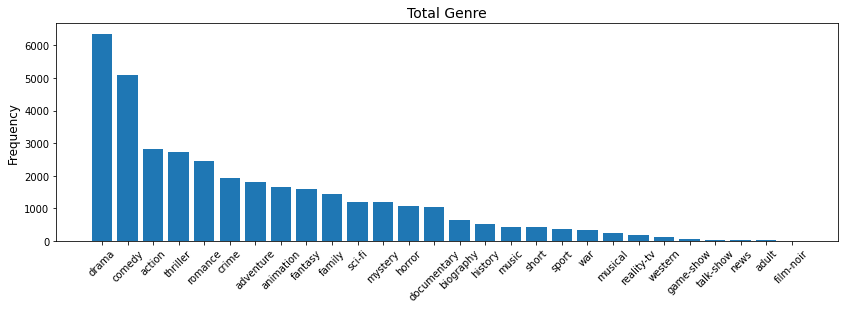

In [55]:
fig, ax = plt.subplots(figsize = (14,4))
ax.bar(to_1D(at_ohe_trial_df['Genre_List']).value_counts().index,
        to_1D(at_ohe_trial_df['Genre_List']).value_counts().values)
ax.set_ylabel("Frequency", size = 12)
ax.set_title("Total Genre", size = 14)
ax.tick_params(axis='x', labelrotation=45)

###  OHE 하기

In [56]:
def boolean_df(item_lists, unique_items):
# Create empty dict
    bool_dict = {}
    
    # Loop through all the tags
    for i, item in enumerate(unique_items):
        
        # Apply boolean mask
        bool_dict[item] = item_lists.apply(lambda x: item in x)
            
    # Return the results as a dataframe
    return pd.DataFrame(bool_dict)

In [57]:
genre_bool_df = boolean_df(at_ohe_trial_df['Genre_List'], unique_items)

In [58]:
genre_bool_df.head()

,drama,comedy,action,thriller,romance,crime,adventure,animation,fantasy,family,sci-fi,mystery,horror,documentary,biography,history,music,short,sport,war,musical,reality-tv,western,game-show,talk-show,news,adult,film-noir
0,True,False,False,False,True,True,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False


In [59]:
genre_int_df = genre_bool_df.astype(int)

In [60]:
genre_int_df.head()

,drama,comedy,action,thriller,romance,crime,adventure,animation,fantasy,family,sci-fi,mystery,horror,documentary,biography,history,music,short,sport,war,musical,reality-tv,western,game-show,talk-show,news,adult,film-noir
0,1,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [61]:
at_ohe_df = at_ohe_trial_df.copy()
at_ohe_df.head()

,Title,Genre_List,Series or Movie_Movie,Series or Movie_Series
0,Lets Fight Ghost,"[crime, drama, fantasy, horror, romance]",0,1
1,HOW TO BUILD A GIRL,[comedy],1,0
2,Centigrade,"[drama, thriller]",1,0
3,ANNE+,[drama],0,1
4,Moxie,"[animation, short, drama]",1,0


In [62]:
at_ohe_df = pd.concat([at_ohe_trial_df, genre_int_df], axis=1)
at_ohe_df.head()

,Title,Genre_List,Series or Movie_Movie,Series or Movie_Series,drama,comedy,action,thriller,romance,crime,adventure,animation,fantasy,family,sci-fi,mystery,horror,documentary,biography,history,music,short,sport,war,musical,reality-tv,western,game-show,talk-show,news,adult,film-noir
0,Lets Fight Ghost,"[crime, drama, fantasy, horror, romance]",0,1,1,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,HOW TO BUILD A GIRL,[comedy],1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Centigrade,"[drama, thriller]",1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,ANNE+,[drama],0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Moxie,"[animation, short, drama]",1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


- talk-show만 따보자

In [63]:
at_ohe_df[(at_ohe_df['talk-show'] == 1) & (at_ohe_df['Series or Movie_Series'] == 1)].head()

,Title,Genre_List,Series or Movie_Movie,Series or Movie_Series,drama,comedy,action,thriller,romance,crime,adventure,animation,fantasy,family,sci-fi,mystery,horror,documentary,biography,history,music,short,sport,war,musical,reality-tv,western,game-show,talk-show,news,adult,film-noir
396,The Netflix Afterparty,[talk-show],0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
688,Morning Express,"[news, talk-show]",0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
3138,Frank Elstner Just One Last Question,[talk-show],0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3960,What the Love! with Karan Johar,[talk-show],0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4317,Weekly Idol,"[game-show, talk-show]",0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0


In [64]:
at_ohe_df.insert(2,'Series or Movies', df['Series or Movie'].values)

In [65]:
# Series 기준
at_ohe_df.groupby('Series or Movies').sum().T.sort_values(by='Series', ascending=False)


Series or Movies,Movie,Series
Series or Movie_Series,0.0,3783.0
drama,4959.0,1400.0
comedy,3967.0,1110.0
animation,788.0,877.0
action,2248.0,562.0
romance,1884.0,561.0
fantasy,1057.0,537.0
adventure,1364.0,445.0
crime,1496.0,436.0
thriller,2314.0,425.0


In [66]:
# Movies 기준
at_ohe_df.groupby('Series or Movies').sum().T.sort_values(by='Movie', ascending=False)

Series or Movies,Movie,Series
Series or Movie_Movie,11697.0,0.0
drama,4959.0,1400.0
comedy,3967.0,1110.0
thriller,2314.0,425.0
action,2248.0,562.0
romance,1884.0,561.0
crime,1496.0,436.0
adventure,1364.0,445.0
fantasy,1057.0,537.0
family,1032.0,401.0


### Genre Heatmap

In [67]:
genre_freq_mat = np.dot(genre_int_df.T, genre_int_df)
genre_freq_mat

array([[6359, 1570, 1012, 1481, 1534, 1123,  524,  381,  543,  347,  417,
         689,  339,   53,  495,  382,  214,  117,  203,  258,   99,    9,
          63,    1,    1,    3,    1,    1],
       [1570, 5077,  742,  250, 1270,  448,  781,  808,  726,  830,  335,
         150,  163,  103,   55,   44,  146,  109,  107,   26,  134,    9,
          28,    5,   10,    1,    1,    0],
       [1012,  742, 2810, 1124,  214,  777,  937,  595,  599,  247,  710,
         225,  229,   13,   55,  122,   15,   38,   64,  118,   15,    0,
          40,    0,    0,    0,    0,    0],
       [1481,  250, 1124, 2739,  161, 1066,  332,  104,  250,   32,  419,
         759,  591,    3,   71,   67,   13,   26,   13,   69,    6,    1,
          22,    0,    1,    0,    0,    2],
       [1534, 1270,  214,  161, 2445,  106,  147,  196,  322,  139,   93,
         109,   56,    8,   90,   91,  116,   20,   35,   61,   76,    9,
          10,    2,    0,    0,    1,    0],
       [1123,  448,  777, 1066,  10

In [68]:
genre_freq_df = pd.DataFrame(genre_freq_mat, columns = unique_items, index = unique_items)
genre_freq_df

,drama,comedy,action,thriller,romance,crime,adventure,animation,fantasy,family,sci-fi,mystery,horror,documentary,biography,history,music,short,sport,war,musical,reality-tv,western,game-show,talk-show,news,adult,film-noir
drama,6359,1570,1012,1481,1534,1123,524,381,543,347,417,689,339,53,495,382,214,117,203,258,99,9,63,1,1,3,1,1
comedy,1570,5077,742,250,1270,448,781,808,726,830,335,150,163,103,55,44,146,109,107,26,134,9,28,5,10,1,1,0
action,1012,742,2810,1124,214,777,937,595,599,247,710,225,229,13,55,122,15,38,64,118,15,0,40,0,0,0,0,0
thriller,1481,250,1124,2739,161,1066,332,104,250,32,419,759,591,3,71,67,13,26,13,69,6,1,22,0,1,0,0,2
romance,1534,1270,214,161,2445,106,147,196,322,139,93,109,56,8,90,91,116,20,35,61,76,9,10,2,0,0,1,0
crime,1123,448,777,1066,106,1932,140,64,61,35,76,369,83,75,105,43,18,16,16,12,6,1,20,0,0,1,0,1
adventure,524,781,937,332,147,140,1809,737,759,674,525,158,134,10,35,63,22,51,19,44,64,5,37,1,1,2,0,0
animation,381,808,595,104,196,64,737,1665,706,720,372,131,87,7,5,17,39,99,44,18,73,0,8,0,1,0,0,0
fantasy,543,726,599,250,322,61,759,706,1594,537,347,210,238,2,4,20,25,38,11,19,73,0,7,0,0,0,1,0
family,347,830,247,32,139,35,674,720,537,1433,210,61,27,26,21,14,50,75,45,8,94,2,12,4,0,2,0,0


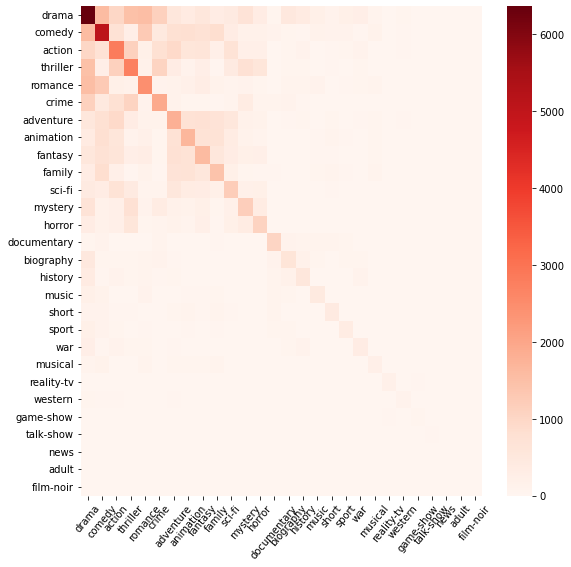

In [69]:
fig, ax = plt.subplots(figsize = (9,9))
sns.heatmap(genre_freq_df, cmap = "Reds")
ax.tick_params(axis='x', labelrotation=50)
# plt.savefig("heatmap.png", dpi = 300)

# Release Date  

In [70]:
release_date_df = df[['Release Date' ,'Netflix Release Date']]
release_date_df.head()

,Release Date,Netflix Release Date
0,12 Dec 2008,2021-03-04
1,08 May 2020,2021-03-04
2,28 Aug 2020,2021-03-04
3,01 Oct 2016,2021-03-04
4,22 Sep 2011,2021-03-04


In [71]:
print(type(df[['Release Date']].iloc[:,0][0]))
print(df[['Release Date']].iloc[:,0][0])

<class 'str'>
12 Dec 2008


In [72]:
print(type(release_date_df.iloc[:,1][0]))
print(release_date_df.iloc[:,1][0])

<class 'str'>
2021-03-04


###  Converting Netflix Release Date's data type to datetime

In [73]:
netflix_released_datetime = pd.to_datetime(release_date_df['Netflix Release Date'])

In [74]:
netflix_released_df = pd.DataFrame(netflix_released_datetime)

In [75]:
print(netflix_released_df['Netflix Release Date'][0])
print(netflix_released_df['Netflix Release Date'][0].year)

2021-03-04 00:00:00
2021


In [76]:
###  Converting Release Date's data type to datetime

In [77]:
release_date_df.iloc[:,0][0]

'12 Dec 2008'

In [78]:
d = datetime.strptime(release_date_df.iloc[:,0][0], '%d %b %Y')
# d = datetime.strptime(None, '%d %b %Y')
print(d)

2008-12-12 00:00:00


In [79]:
release_date_df['Release Date Converted'] = pd.to_datetime(release_date_df['Release Date'], format='%d %b %Y')
release_date_df

<ipython-input-79-99f6913015b4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  release_date_df['Release Date Converted'] = pd.to_datetime(release_date_df['Release Date'], format='%d %b %Y')


,Release Date,Netflix Release Date,Release Date Converted
0,12 Dec 2008,2021-03-04,2008-12-12
1,08 May 2020,2021-03-04,2020-05-08
2,28 Aug 2020,2021-03-04,2020-08-28
3,01 Oct 2016,2021-03-04,2016-10-01
4,22 Sep 2011,2021-03-04,2011-09-22
...,...,...,...
15475,NaN,2015-04-14,NaT
15476,NaN,2015-04-14,NaT
15477,NaN,2015-04-14,NaT
15478,NaN,2015-04-14,NaT


In [80]:
df.columns

Index(['Title', 'Genre', 'Tags', 'Languages', 'Series or Movie',
       'Hidden Gem Score', 'Country Availability', 'Runtime', 'Director',
       'Writer', 'Actors', 'View Rating', 'IMDb Score',
       'Rotten Tomatoes Score', 'Metacritic Score', 'Awards Received',
       'Awards Nominated For', 'Boxoffice', 'Release Date',
       'Netflix Release Date', 'Production House', 'Netflix Link', 'IMDb Link',
       'Summary', 'IMDb Votes', 'Image', 'Poster', 'TMDb Trailer',
       'Trailer Site'],
      dtype='object')

### Language 전처리!!

In [81]:
print(df['Languages'].unique())
df['Languages'].value_counts()

['Swedish, Spanish' 'English' 'Turkish' ...
 'English, French, Tibetan, Mandarin, Russian, Hindi, Portuguese, Latin, Italian, Spanish'
 'English, Ibo, Yoruba, Hausa' 'English, Hawaiian, Mandarin']


English                        5133
Japanese                       1213
Korean                          541
Spanish                         382
Hindi                           329
                               ... 
Hungarian, French, English        1
Arabic, Nyanja, English           1
Dutch, Flemish                    1
Thai, Japanese                    1
English, Hawaiian, Mandarin       1
Name: Languages, Length: 1438, dtype: int64

In [82]:
tag_list_df.head()

,Title,Genre,Genre_List,Tags,Tags_List,Languages,Series or Movie,Hidden Gem Score,Country Availability,Runtime,Director,Writer,Actors,View Rating,IMDb Score,Rotten Tomatoes Score,Metacritic Score,Awards Received,Awards Nominated For,Boxoffice,Release Date,Netflix Release Date,Production House,Netflix Link,IMDb Link,Summary,IMDb Votes,Image,Poster,TMDb Trailer,Trailer Site
0,Lets Fight Ghost,"Crime, Drama, Fantasy, Horror, Romance","[crime, drama, fantasy, horror, romance]","Comedy Programmes,Romantic TV Comedies,Horror ...","[comedy programmes, romantic tv comedies, horr...","Swedish, Spanish",Series,4.3,Thailand,< 30 minutes,Tomas Alfredson,John Ajvide Lindqvist,"Kåre Hedebrant, Per Ragnar, Lina Leandersson, ...",R,7.9,98.0,82.0,74.0,57.0,"$2,122,065",12 Dec 2008,2021-03-04,"Canal+, Sandrew Metronome",https://www.netflix.com/watch/81415947,https://www.imdb.com/title/tt1139797,A med student with a supernatural gift tries t...,205926.0,https://occ-0-4708-64.1.nflxso.net/dnm/api/v6/...,https://m.media-amazon.com/images/M/MV5BOWM4NT...,NaN,NaN
1,HOW TO BUILD A GIRL,Comedy,[comedy],"Dramas,Comedies,Films Based on Books,British","[dramas, comedies, films based on books, british]",English,Movie,7.0,Canada,1-2 hour,Coky Giedroyc,Caitlin Moran,"Paddy Considine, Cleo, Beanie Feldstein, Dónal...",R,5.8,79.0,69.0,1.0,NaN,"$70,632",08 May 2020,2021-03-04,"Film 4, Monumental Pictures, Lionsgate",https://www.netflix.com/watch/81041267,https://www.imdb.com/title/tt4193072,"When nerdy Johanna moves to London, things get...",2838.0,https://occ-0-1081-999.1.nflxso.net/dnm/api/v6...,https://m.media-amazon.com/images/M/MV5BZGUyN2...,https://www.youtube.com/watch?v=eIbcxPy4okQ,YouTube
2,Centigrade,"Drama, Thriller","[drama, thriller]",Thrillers,[thrillers],English,Movie,6.4,Canada,1-2 hour,Brendan Walsh,"Brendan Walsh, Daley Nixon","Genesis Rodriguez, Vincent Piazza",Unrated,4.3,NaN,46.0,NaN,NaN,"$16,263",28 Aug 2020,2021-03-04,NaN,https://www.netflix.com/watch/81305978,https://www.imdb.com/title/tt8945942,"Trapped in a frozen car during a blizzard, a p...",1720.0,https://occ-0-1081-999.1.nflxso.net/dnm/api/v6...,https://m.media-amazon.com/images/M/MV5BODM2MD...,https://www.youtube.com/watch?v=0RvV7TNUlkQ,YouTube
3,ANNE+,Drama,[drama],"TV Dramas,Romantic TV Dramas,Dutch TV Shows","[tv dramas, romantic tv dramas, dutch tv shows]",Turkish,Series,7.7,"Belgium,Netherlands",< 30 minutes,NaN,NaN,"Vahide Perçin, Gonca Vuslateri, Cansu Dere, Be...",NaN,6.5,NaN,NaN,1.0,NaN,NaN,01 Oct 2016,2021-03-04,NaN,https://www.netflix.com/watch/81336456,https://www.imdb.com/title/tt6132758,"Upon moving into a new place, a 20-something r...",1147.0,https://occ-0-1489-1490.1.nflxso.net/dnm/api/v...,https://m.media-amazon.com/images/M/MV5BNWRkMz...,NaN,NaN
4,Moxie,"Animation, Short, Drama","[animation, short, drama]","Social Issue Dramas,Teen Movies,Dramas,Comedie...","[social issue dramas, teen movies, dramas, com...",English,Movie,8.1,"Lithuania,Poland,France,Iceland,Italy,Spain,Gr...",1-2 hour,Stephen Irwin,NaN,Ragga Gudrun,NaN,6.3,NaN,NaN,NaN,4.0,NaN,22 Sep 2011,2021-03-04,NaN,https://www.netflix.com/watch/81078393,https://www.imdb.com/title/tt2023611,Inspired by her moms rebellious past and a con...,63.0,https://occ-0-4039-1500.1.nflxso.net/dnm/api/v...,https://m.media-amazon.com/images/M/MV5BODYyNW...,NaN,NaN


In [83]:
language_before_rg = df['Languages']
reg_language = []

for i in range(len(language_before_rg)):
    try:
        target = df.iloc[i,3].replace(' ','').lower().split(',')
        reg_language.append(target)

#         print(target)
    except:
        reg_language.append([])

In [84]:
print(type(reg_genre), type(reg_genre[0]), type(reg_genre[0][0]))
print(type(reg_language), type(reg_language[0]), type(reg_language[0][0]))
print(reg_genre[0], reg_genre[0][0])
print(reg_language[0], reg_language[0][0])

<class 'list'> <class 'list'> <class 'str'>
<class 'list'> <class 'list'> <class 'str'>
['crime', 'drama', 'fantasy', 'horror', 'romance'] crime
['swedish', 'spanish'] swedish


In [85]:
reg_language

[['swedish', 'spanish'],
 ['english'],
 ['english'],
 ['turkish'],
 ['english'],
 ['thai'],
 ['polish'],
 ['polish'],
 ['swedish'],
 ['swedish', 'english', 'german', 'norwegian'],
 ['swedish'],
 ['english'],
 ['scanian', 'swedish'],
 ['swedish', 'english'],
 ['spanish'],
 ['english'],
 ['english', 'sanskrit'],
 ['english'],
 ['swedish'],
 ['swedish'],
 [],
 ['swedish'],
 ['swedish'],
 ['japanese'],
 ['hindi'],
 ['english'],
 ['english'],
 ['cantonese', 'mandarin', 'english'],
 ['french'],
 ['japanese', 'english'],
 ['japanese'],
 ['japanese'],
 ['japanese'],
 ['japanese'],
 ['japanese'],
 ['japanese', 'english'],
 ['japanese', 'english'],
 ['japanese'],
 ['japanese'],
 ['japanese'],
 ['japanese'],
 ['english'],
 ['english'],
 ['french'],
 ['english'],
 ['english'],
 ['english', 'italian'],
 ['french'],
 ['french', 'breton'],
 ['french', 'english'],
 ['english'],
 ['english'],
 ['english'],
 ['english'],
 ['english', 'cantonese'],
 ['mandarin'],
 ['english'],
 ['english'],
 ['korean'],


In [86]:
tag_list_df.head(1)

,Title,Genre,Genre_List,Tags,Tags_List,Languages,Series or Movie,Hidden Gem Score,Country Availability,Runtime,Director,Writer,Actors,View Rating,IMDb Score,Rotten Tomatoes Score,Metacritic Score,Awards Received,Awards Nominated For,Boxoffice,Release Date,Netflix Release Date,Production House,Netflix Link,IMDb Link,Summary,IMDb Votes,Image,Poster,TMDb Trailer,Trailer Site
0,Lets Fight Ghost,"Crime, Drama, Fantasy, Horror, Romance","[crime, drama, fantasy, horror, romance]","Comedy Programmes,Romantic TV Comedies,Horror ...","[comedy programmes, romantic tv comedies, horr...","Swedish, Spanish",Series,4.3,Thailand,< 30 minutes,Tomas Alfredson,John Ajvide Lindqvist,"Kåre Hedebrant, Per Ragnar, Lina Leandersson, ...",R,7.9,98.0,82.0,74.0,57.0,"$2,122,065",12 Dec 2008,2021-03-04,"Canal+, Sandrew Metronome",https://www.netflix.com/watch/81415947,https://www.imdb.com/title/tt1139797,A med student with a supernatural gift tries t...,205926.0,https://occ-0-4708-64.1.nflxso.net/dnm/api/v6/...,https://m.media-amazon.com/images/M/MV5BOWM4NT...,NaN,NaN


In [87]:
tag_list_df.insert(6, 'Languages_List', reg_language)

In [88]:
languages_list_df = tag_list_df.copy()
languages_list_df.head(1)

,Title,Genre,Genre_List,Tags,Tags_List,Languages,Languages_List,Series or Movie,Hidden Gem Score,Country Availability,Runtime,Director,Writer,Actors,View Rating,IMDb Score,Rotten Tomatoes Score,Metacritic Score,Awards Received,Awards Nominated For,Boxoffice,Release Date,Netflix Release Date,Production House,Netflix Link,IMDb Link,Summary,IMDb Votes,Image,Poster,TMDb Trailer,Trailer Site
0,Lets Fight Ghost,"Crime, Drama, Fantasy, Horror, Romance","[crime, drama, fantasy, horror, romance]","Comedy Programmes,Romantic TV Comedies,Horror ...","[comedy programmes, romantic tv comedies, horr...","Swedish, Spanish","[swedish, spanish]",Series,4.3,Thailand,< 30 minutes,Tomas Alfredson,John Ajvide Lindqvist,"Kåre Hedebrant, Per Ragnar, Lina Leandersson, ...",R,7.9,98.0,82.0,74.0,57.0,"$2,122,065",12 Dec 2008,2021-03-04,"Canal+, Sandrew Metronome",https://www.netflix.com/watch/81415947,https://www.imdb.com/title/tt1139797,A med student with a supernatural gift tries t...,205926.0,https://occ-0-4708-64.1.nflxso.net/dnm/api/v6/...,https://m.media-amazon.com/images/M/MV5BOWM4NT...,NaN,NaN


# Language List One Hot Encoding

In [89]:
# genre OHE 시켰던 to_1D & boolean_df 사용
to_1D(languages_list_df['Languages_List']).value_counts()


english                           8041
japanese                          1667
spanish                           1143
french                            1055
korean                             735
                                  ... 
tupi                                 1
scanian                              1
bable                                1
centralamericanindianlanguages       1
uighur                               1
Length: 192, dtype: int64

In [90]:
values = to_1D(languages_list_df['Languages_List']).value_counts().keys().tolist()
counts = to_1D(languages_list_df['Languages_List']).value_counts().tolist()
unique_items = dict(zip(values, counts))
unique_items

{'english': 8041,
 'japanese': 1667,
 'spanish': 1143,
 'french': 1055,
 'korean': 735,
 'german': 682,
 'hindi': 539,
 'mandarin': 491,
 'italian': 484,
 'russian': 335,
 'cantonese': 302,
 'arabic': 300,
 'portuguese': 258,
 'thai': 207,
 'polish': 192,
 'dutch': 182,
 'swedish': 178,
 'turkish': 176,
 'czech': 151,
 'chinese': 137,
 'danish': 122,
 'romanian': 111,
 'indonesian': 99,
 'latin': 98,
 'filipino': 93,
 'hebrew': 89,
 'tagalog': 87,
 'tamil': 86,
 'norwegian': 84,
 'hungarian': 66,
 'malay': 59,
 'ukrainian': 52,
 'punjabi': 49,
 'malayalam': 48,
 'urdu': 47,
 'greek': 44,
 'none': 40,
 'telugu': 38,
 'vietnamese': 35,
 'marathi': 31,
 'afrikaans': 31,
 'bengali': 30,
 'minnan': 28,
 'hokkien': 28,
 'persian': 27,
 'yiddish': 26,
 'americansignlanguage': 26,
 'finnish': 25,
 'catalan': 23,
 'serbian': 22,
 'slovak': 21,
 'swahili': 18,
 'sanskrit': 18,
 'zulu': 17,
 'irish': 16,
 'flemish': 14,
 'basque': 13,
 'icelandic': 12,
 'bulgarian': 11,
 'yoruba': 11,
 'gujarati'

In [91]:
languages_bool_df = boolean_df(languages_list_df['Languages_List'], unique_items)

In [92]:
languages_bool_df.head()

,english,japanese,spanish,french,korean,german,hindi,mandarin,italian,russian,cantonese,arabic,portuguese,thai,polish,dutch,swedish,turkish,czech,chinese,danish,romanian,indonesian,latin,filipino,hebrew,tagalog,tamil,norwegian,hungarian,malay,ukrainian,punjabi,malayalam,urdu,greek,none,telugu,vietnamese,marathi,afrikaans,bengali,minnan,hokkien,persian,yiddish,americansignlanguage,finnish,catalan,serbian,slovak,swahili,sanskrit,zulu,irish,flemish,basque,icelandic,bulgarian,yoruba,gujarati,klingon,georgian,serbo-croatian,swissgerman,aboriginal,xhosa,scottishgaelic,khmer,kannada,mongolian,pushto,romany,welsh,albanian,ibo,tibetan,signlanguages,hawaiian,southernsotho,armenian,esperanto,croatian,wolof,bosnian,quechua,assamese,latvian,dari,somali,hausa,saami,ancient(to1453),kurdish,maori,shanghainese,egyptian(ancient),northamericanindian,lingala,inuktitut,oldenglish,neapolitan,estonian,japanesesignlanguage,akan,luxembourgish,sindarin,lithuanian,bhojpuri,sinhalese,kinyarwanda,cornish,scots,burmese,papiamento,belarusian,chechen,frenchsignlanguage,sioux,manipuri,nepali,pawnee,east-greenlandic,aramaic,koreansignlanguage,tajik,apachelanguages,greenlandic,nyanja,lao,uzbek,sicilian,gallegan,mixtec,tswana,sranan,acholi,hakka,amharic,berberlanguages,braziliansignlanguage,kriolu,aragonese,navajo,tlingit,kazakh,haitian,syriac,tulu,faroese,maltese,malinka,algonquin,mohawk,chaozhou,mapudungun,hmong,dinka,mende,tokpisin,norse,old,quenya,slovenian,spanishsignlanguage,cree,cheyenne,wayuu,tatar,tarahumara,aromanian,occitan,nama,turkmen,nahuatl,divehi,teochew,polynesian,shoshoni,fulah,awadhi,azerbaijani,parsee,kikuyu,britishsignlanguage,breton,maya,tupi,scanian,bable,centralamericanindianlanguages,uighur
0,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Fals

In [93]:
languages_int_df = languages_bool_df.astype(int)

In [94]:
languages_int_df.head()

,english,japanese,spanish,french,korean,german,hindi,mandarin,italian,russian,cantonese,arabic,portuguese,thai,polish,dutch,swedish,turkish,czech,chinese,danish,romanian,indonesian,latin,filipino,hebrew,tagalog,tamil,norwegian,hungarian,malay,ukrainian,punjabi,malayalam,urdu,greek,none,telugu,vietnamese,marathi,afrikaans,bengali,minnan,hokkien,persian,yiddish,americansignlanguage,finnish,catalan,serbian,slovak,swahili,sanskrit,zulu,irish,flemish,basque,icelandic,bulgarian,yoruba,gujarati,klingon,georgian,serbo-croatian,swissgerman,aboriginal,xhosa,scottishgaelic,khmer,kannada,mongolian,pushto,romany,welsh,albanian,ibo,tibetan,signlanguages,hawaiian,southernsotho,armenian,esperanto,croatian,wolof,bosnian,quechua,assamese,latvian,dari,somali,hausa,saami,ancient(to1453),kurdish,maori,shanghainese,egyptian(ancient),northamericanindian,lingala,inuktitut,oldenglish,neapolitan,estonian,japanesesignlanguage,akan,luxembourgish,sindarin,lithuanian,bhojpuri,sinhalese,kinyarwanda,cornish,scots,burmese,papiamento,belarusian,chechen,frenchsignlanguage,sioux,manipuri,nepali,pawnee,east-greenlandic,aramaic,koreansignlanguage,tajik,apachelanguages,greenlandic,nyanja,lao,uzbek,sicilian,gallegan,mixtec,tswana,sranan,acholi,hakka,amharic,berberlanguages,braziliansignlanguage,kriolu,aragonese,navajo,tlingit,kazakh,haitian,syriac,tulu,faroese,maltese,malinka,algonquin,mohawk,chaozhou,mapudungun,hmong,dinka,mende,tokpisin,norse,old,quenya,slovenian,spanishsignlanguage,cree,cheyenne,wayuu,tatar,tarahumara,aromanian,occitan,nama,turkmen,nahuatl,divehi,teochew,polynesian,shoshoni,fulah,awadhi,azerbaijani,parsee,kikuyu,britishsignlanguage,breton,maya,tupi,scanian,bable,centralamericanindianlanguages,uighur
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [95]:
languages_int_df[languages_int_df['korean'] == 1]

,english,japanese,spanish,french,korean,german,hindi,mandarin,italian,russian,cantonese,arabic,portuguese,thai,polish,dutch,swedish,turkish,czech,chinese,danish,romanian,indonesian,latin,filipino,hebrew,tagalog,tamil,norwegian,hungarian,malay,ukrainian,punjabi,malayalam,urdu,greek,none,telugu,vietnamese,marathi,afrikaans,bengali,minnan,hokkien,persian,yiddish,americansignlanguage,finnish,catalan,serbian,slovak,swahili,sanskrit,zulu,irish,flemish,basque,icelandic,bulgarian,yoruba,gujarati,klingon,georgian,serbo-croatian,swissgerman,aboriginal,xhosa,scottishgaelic,khmer,kannada,mongolian,pushto,romany,welsh,albanian,ibo,tibetan,signlanguages,hawaiian,southernsotho,armenian,esperanto,croatian,wolof,bosnian,quechua,assamese,latvian,dari,somali,hausa,saami,ancient(to1453),kurdish,maori,shanghainese,egyptian(ancient),northamericanindian,lingala,inuktitut,oldenglish,neapolitan,estonian,japanesesignlanguage,akan,luxembourgish,sindarin,lithuanian,bhojpuri,sinhalese,kinyarwanda,cornish,scots,burmese,papiamento,belarusian,chechen,frenchsignlanguage,sioux,manipuri,nepali,pawnee,east-greenlandic,aramaic,koreansignlanguage,tajik,apachelanguages,greenlandic,nyanja,lao,uzbek,sicilian,gallegan,mixtec,tswana,sranan,acholi,hakka,amharic,berberlanguages,braziliansignlanguage,kriolu,aragonese,navajo,tlingit,kazakh,haitian,syriac,tulu,faroese,maltese,malinka,algonquin,mohawk,chaozhou,mapudungun,hmong,dinka,mende,tokpisin,norse,old,quenya,slovenian,spanishsignlanguage,cree,cheyenne,wayuu,tatar,tarahumara,aromanian,occitan,nama,turkmen,nahuatl,divehi,teochew,polynesian,shoshoni,fulah,awadhi,azerbaijani,parsee,kikuyu,britishsignlanguage,breton,maya,tupi,scanian,bable,centralamericanindianlanguages,uighur
58,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
59,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
61,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
71,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
74,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [96]:
languages_int_df[languages_int_df['korean'] == 1].sum()

english                           138
japanese                           58
spanish                            32
french                             29
korean                            735
                                 ... 
tupi                                0
scanian                             0
bable                               0
centralamericanindianlanguages      0
uighur                              0
Length: 192, dtype: int64

In [97]:
languages_int_w_title = pd.concat([languages_list_df['Title'], languages_int_df], axis=1)

In [98]:
languages_int_w_title.head()

,Title,english,japanese,spanish,french,korean,german,hindi,mandarin,italian,russian,cantonese,arabic,portuguese,thai,polish,dutch,swedish,turkish,czech,chinese,danish,romanian,indonesian,latin,filipino,hebrew,tagalog,tamil,norwegian,hungarian,malay,ukrainian,punjabi,malayalam,urdu,greek,none,telugu,vietnamese,marathi,afrikaans,bengali,minnan,hokkien,persian,yiddish,americansignlanguage,finnish,catalan,serbian,slovak,swahili,sanskrit,zulu,irish,flemish,basque,icelandic,bulgarian,yoruba,gujarati,klingon,georgian,serbo-croatian,swissgerman,aboriginal,xhosa,scottishgaelic,khmer,kannada,mongolian,pushto,romany,welsh,albanian,ibo,tibetan,signlanguages,hawaiian,southernsotho,armenian,esperanto,croatian,wolof,bosnian,quechua,assamese,latvian,dari,somali,hausa,saami,ancient(to1453),kurdish,maori,shanghainese,egyptian(ancient),northamericanindian,lingala,inuktitut,oldenglish,neapolitan,estonian,japanesesignlanguage,akan,luxembourgish,sindarin,lithuanian,bhojpuri,sinhalese,kinyarwanda,cornish,scots,burmese,papiamento,belarusian,chechen,frenchsignlanguage,sioux,manipuri,nepali,pawnee,east-greenlandic,aramaic,koreansignlanguage,tajik,apachelanguages,greenlandic,nyanja,lao,uzbek,sicilian,gallegan,mixtec,tswana,sranan,acholi,hakka,amharic,berberlanguages,braziliansignlanguage,kriolu,aragonese,navajo,tlingit,kazakh,haitian,syriac,tulu,faroese,maltese,malinka,algonquin,mohawk,chaozhou,mapudungun,hmong,dinka,mende,tokpisin,norse,old,quenya,slovenian,spanishsignlanguage,cree,cheyenne,wayuu,tatar,tarahumara,aromanian,occitan,nama,turkmen,nahuatl,divehi,teochew,polynesian,shoshoni,fulah,awadhi,azerbaijani,parsee,kikuyu,britishsignlanguage,breton,maya,tupi,scanian,bable,centralamericanindianlanguages,uighur
0,Lets Fight Ghost,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,HOW TO BUILD A GIRL,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Centigrade,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,ANNE+,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Moxie,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [99]:
languages_int_w_title[languages_int_w_title['korean'] == 1].head(50)

,Title,english,japanese,spanish,french,korean,german,hindi,mandarin,italian,russian,cantonese,arabic,portuguese,thai,polish,dutch,swedish,turkish,czech,chinese,danish,romanian,indonesian,latin,filipino,hebrew,tagalog,tamil,norwegian,hungarian,malay,ukrainian,punjabi,malayalam,urdu,greek,none,telugu,vietnamese,marathi,afrikaans,bengali,minnan,hokkien,persian,yiddish,americansignlanguage,finnish,catalan,serbian,slovak,swahili,sanskrit,zulu,irish,flemish,basque,icelandic,bulgarian,yoruba,gujarati,klingon,georgian,serbo-croatian,swissgerman,aboriginal,xhosa,scottishgaelic,khmer,kannada,mongolian,pushto,romany,welsh,albanian,ibo,tibetan,signlanguages,hawaiian,southernsotho,armenian,esperanto,croatian,wolof,bosnian,quechua,assamese,latvian,dari,somali,hausa,saami,ancient(to1453),kurdish,maori,shanghainese,egyptian(ancient),northamericanindian,lingala,inuktitut,oldenglish,neapolitan,estonian,japanesesignlanguage,akan,luxembourgish,sindarin,lithuanian,bhojpuri,sinhalese,kinyarwanda,cornish,scots,burmese,papiamento,belarusian,chechen,frenchsignlanguage,sioux,manipuri,nepali,pawnee,east-greenlandic,aramaic,koreansignlanguage,tajik,apachelanguages,greenlandic,nyanja,lao,uzbek,sicilian,gallegan,mixtec,tswana,sranan,acholi,hakka,amharic,berberlanguages,braziliansignlanguage,kriolu,aragonese,navajo,tlingit,kazakh,haitian,syriac,tulu,faroese,maltese,malinka,algonquin,mohawk,chaozhou,mapudungun,hmong,dinka,mende,tokpisin,norse,old,quenya,slovenian,spanishsignlanguage,cree,cheyenne,wayuu,tatar,tarahumara,aromanian,occitan,nama,turkmen,nahuatl,divehi,teochew,polynesian,shoshoni,fulah,awadhi,azerbaijani,parsee,kikuyu,britishsignlanguage,breton,maya,tupi,scanian,bable,centralamericanindianlanguages,uighur
58,Miss Baek,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
59,Old Marine Boy,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
61,Outdoor Begins,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
71,A Tiger In Winter,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
74,Keys To The Heart,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
76,Homme Fatale,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

#  Country Availability Preprocessing

In [100]:
df.head(1)

,Title,Genre,Tags,Languages,Series or Movie,Hidden Gem Score,Country Availability,Runtime,Director,Writer,Actors,View Rating,IMDb Score,Rotten Tomatoes Score,Metacritic Score,Awards Received,Awards Nominated For,Boxoffice,Release Date,Netflix Release Date,Production House,Netflix Link,IMDb Link,Summary,IMDb Votes,Image,Poster,TMDb Trailer,Trailer Site
0,Lets Fight Ghost,"Crime, Drama, Fantasy, Horror, Romance","Comedy Programmes,Romantic TV Comedies,Horror ...","Swedish, Spanish",Series,4.3,Thailand,< 30 minutes,Tomas Alfredson,John Ajvide Lindqvist,"Kåre Hedebrant, Per Ragnar, Lina Leandersson, ...",R,7.9,98.0,82.0,74.0,57.0,"$2,122,065",12 Dec 2008,2021-03-04,"Canal+, Sandrew Metronome",https://www.netflix.com/watch/81415947,https://www.imdb.com/title/tt1139797,A med student with a supernatural gift tries t...,205926.0,https://occ-0-4708-64.1.nflxso.net/dnm/api/v6/...,https://m.media-amazon.com/images/M/MV5BOWM4NT...,NaN,NaN


In [101]:
ca_before_rg = df['Country Availability']
reg_ca = []

for i in range(len(ca_before_rg)):
    try:
        target = df.iloc[i,6].replace(' ','').lower().split(',')
        reg_ca.append(target)

#         print(target)
    except:
        reg_ca.append([])

In [102]:
reg_ca

[['thailand'],
 ['canada'],
 ['canada'],
 ['belgium', 'netherlands'],
 ['lithuania',
  'poland',
  'france',
  'iceland',
  'italy',
  'spain',
  'greece',
  'czechrepublic',
  'belgium',
  'portugal',
  'canada',
  'hungary',
  'mexico',
  'slovakia',
  'sweden',
  'southafrica',
  'netherlands',
  'germany',
  'thailand',
  'turkey',
  'singapore',
  'romania',
  'argentina',
  'israel',
  'switzerland',
  'australia',
  'unitedkingdom',
  'brazil',
  'malaysia',
  'india',
  'colombia',
  'hongkong',
  'japan',
  'southkorea',
  'unitedstates',
  'russia'],
 ['thailand'],
 ['poland'],
 ['poland'],
 ['lithuania',
  'poland',
  'france',
  'italy',
  'spain',
  'greece',
  'belgium',
  'portugal',
  'netherlands',
  'germany',
  'switzerland',
  'unitedkingdom',
  'iceland',
  'czechrepublic'],
 ['lithuania',
  'poland',
  'france',
  'italy',
  'spain',
  'greece',
  'czechrepublic',
  'belgium',
  'portugal',
  'hungary',
  'slovakia',
  'netherlands',
  'germany',
  'romania',
  's

In [103]:
languages_list_df.head(1)

,Title,Genre,Genre_List,Tags,Tags_List,Languages,Languages_List,Series or Movie,Hidden Gem Score,Country Availability,Runtime,Director,Writer,Actors,View Rating,IMDb Score,Rotten Tomatoes Score,Metacritic Score,Awards Received,Awards Nominated For,Boxoffice,Release Date,Netflix Release Date,Production House,Netflix Link,IMDb Link,Summary,IMDb Votes,Image,Poster,TMDb Trailer,Trailer Site
0,Lets Fight Ghost,"Crime, Drama, Fantasy, Horror, Romance","[crime, drama, fantasy, horror, romance]","Comedy Programmes,Romantic TV Comedies,Horror ...","[comedy programmes, romantic tv comedies, horr...","Swedish, Spanish","[swedish, spanish]",Series,4.3,Thailand,< 30 minutes,Tomas Alfredson,John Ajvide Lindqvist,"Kåre Hedebrant, Per Ragnar, Lina Leandersson, ...",R,7.9,98.0,82.0,74.0,57.0,"$2,122,065",12 Dec 2008,2021-03-04,"Canal+, Sandrew Metronome",https://www.netflix.com/watch/81415947,https://www.imdb.com/title/tt1139797,A med student with a supernatural gift tries t...,205926.0,https://occ-0-4708-64.1.nflxso.net/dnm/api/v6/...,https://m.media-amazon.com/images/M/MV5BOWM4NT...,NaN,NaN


In [104]:
languages_list_df.insert(10, 'Country Availability_List', reg_ca)

In [105]:
ca_list_df = languages_list_df.copy()
ca_list_df[['Country Availability','Country Availability_List']]

,Country Availability,Country Availability_List
0,Thailand,[thailand]
1,Canada,[canada]
2,Canada,[canada]
3,"Belgium,Netherlands","[belgium, netherlands]"
4,"Lithuania,Poland,France,Iceland,Italy,Spain,Gr...","[lithuania, poland, france, iceland, italy, sp..."
...,...,...
15475,"South Korea,Argentina,United Kingdom,Australia...","[southkorea, argentina, unitedkingdom, austral..."
15476,"Russia,Hong Kong,Hungary,Australia,South Korea...","[russia, hongkong, hungary, australia, southko..."
15477,"Belgium,Switzerland,United States,Germany,Unit...","[belgium, switzerland, unitedstates, germany, ..."
15478,"Belgium,Switzerland,Germany,Argentina,United K...","[belgium, switzerland, germany, argentina, uni..."


# Country Availability_List OHE

In [106]:
to_1D(ca_list_df['Country Availability_List']).value_counts()

unitedkingdom    6311
czechrepublic    6237
japan            6115
hungary          5989
canada           5930
thailand         5876
singapore        5876
india            5826
slovakia         5820
australia        5820
romania          5759
unitedstates     5718
southafrica      5553
lithuania        5541
germany          5539
russia           5491
switzerland      5472
belgium          5437
malaysia         5394
iceland          5364
greece           5324
israel           5198
france           5194
hongkong         5188
mexico           5148
italy            5141
argentina        5138
poland           5136
brazil           5057
netherlands      5021
spain            5010
colombia         4867
southkorea       4845
turkey           4814
sweden           4751
portugal         4685
dtype: int64

In [107]:
values = to_1D(ca_list_df['Country Availability_List']).value_counts().keys().tolist()
counts = to_1D(ca_list_df['Country Availability_List']).value_counts().tolist()
unique_items = dict(zip(values, counts))
unique_items

{'unitedkingdom': 6311,
 'czechrepublic': 6237,
 'japan': 6115,
 'hungary': 5989,
 'canada': 5930,
 'thailand': 5876,
 'singapore': 5876,
 'india': 5826,
 'slovakia': 5820,
 'australia': 5820,
 'romania': 5759,
 'unitedstates': 5718,
 'southafrica': 5553,
 'lithuania': 5541,
 'germany': 5539,
 'russia': 5491,
 'switzerland': 5472,
 'belgium': 5437,
 'malaysia': 5394,
 'iceland': 5364,
 'greece': 5324,
 'israel': 5198,
 'france': 5194,
 'hongkong': 5188,
 'mexico': 5148,
 'italy': 5141,
 'argentina': 5138,
 'poland': 5136,
 'brazil': 5057,
 'netherlands': 5021,
 'spain': 5010,
 'colombia': 4867,
 'southkorea': 4845,
 'turkey': 4814,
 'sweden': 4751,
 'portugal': 4685}

In [108]:
ca_bool_df = boolean_df(ca_list_df['Country Availability_List'], unique_items)

In [109]:
ca_bool_df.head()

,unitedkingdom,czechrepublic,japan,hungary,canada,thailand,singapore,india,slovakia,australia,romania,unitedstates,southafrica,lithuania,germany,russia,switzerland,belgium,malaysia,iceland,greece,israel,france,hongkong,mexico,italy,argentina,poland,brazil,netherlands,spain,colombia,southkorea,turkey,sweden,portugal
0,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
4,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True


In [110]:
ca_int_df = ca_bool_df.astype(int)

In [111]:
ca_int_df.head()

,unitedkingdom,czechrepublic,japan,hungary,canada,thailand,singapore,india,slovakia,australia,romania,unitedstates,southafrica,lithuania,germany,russia,switzerland,belgium,malaysia,iceland,greece,israel,france,hongkong,mexico,italy,argentina,poland,brazil,netherlands,spain,colombia,southkorea,turkey,sweden,portugal
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [112]:
ca_int_w_title_df = pd.concat([languages_list_df[['Title', 'Series or Movie']], ca_int_df], axis=1)
ca_int_w_title_df.head()

,Title,Series or Movie,unitedkingdom,czechrepublic,japan,hungary,canada,thailand,singapore,india,slovakia,australia,romania,unitedstates,southafrica,lithuania,germany,russia,switzerland,belgium,malaysia,iceland,greece,israel,france,hongkong,mexico,italy,argentina,poland,brazil,netherlands,spain,colombia,southkorea,turkey,sweden,portugal
0,Lets Fight Ghost,Series,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,HOW TO BUILD A GIRL,Movie,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Centigrade,Movie,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,ANNE+,Series,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,Moxie,Movie,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


- 넷플릭스 한국에서 서비스하는 컨텐츠


In [113]:
ca_int_w_title_df[ca_int_w_title_df['southkorea']==1].groupby('Series or Movie').sum()['southkorea']

Series or Movie
Movie     3075
Series    1770
Name: southkorea, dtype: int32

In [114]:
ca_int_w_title_df[(ca_int_w_title_df['southkorea']==1) & (ca_int_w_title_df['Series or Movie'] == 'Movie')].head(100)

,Title,Series or Movie,unitedkingdom,czechrepublic,japan,hungary,canada,thailand,singapore,india,slovakia,australia,romania,unitedstates,southafrica,lithuania,germany,russia,switzerland,belgium,malaysia,iceland,greece,israel,france,hongkong,mexico,italy,argentina,poland,brazil,netherlands,spain,colombia,southkorea,turkey,sweden,portugal
4,Moxie,Movie,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
27,Comrades Almost a Love Story,Movie,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
28,The Closet,Movie,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
55,Lobster Cop,Movie,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
56,Magic hour,Movie,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
471,Cops and Robbers,Movie,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
472,A Moment of Romance,Movie,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
473,Nobodys Daughter Haewon,Movie,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
474,Rent-a-Cat,Movie,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


### Country Availability_List == SouthKorea

In [115]:
service_in_korea_df = ca_int_w_title_df[(ca_int_w_title_df['southkorea']==1)].iloc[:,[0]]
print(service_in_korea_df.count())
service_in_korea_df

Title    4845
dtype: int64


,Title
4,Moxie
27,Comrades Almost a Love Story
28,The Closet
53,The Bold Type
55,Lobster Cop
...,...
15475,K-POP Extreme Survival
15476,DreamWorks Shreks Swamp Stories
15477,DreamWorks Happy Holidays from Madagascar
15478,DreamWorks Holiday Classics


# 쓸 만한 data만 모아보자 

In [116]:
to_use_df = pd.DataFrame(reg_title, columns=['Title'])
to_use_df

,Title
0,Lets Fight Ghost
1,HOW TO BUILD A GIRL
2,Centigrade
3,ANNE+
4,Moxie
...,...
15475,K-POP Extreme Survival
15476,DreamWorks Shreks Swamp Stories
15477,DreamWorks Happy Holidays from Madagascar
15478,DreamWorks Holiday Classics


In [117]:
to_use_df = pd.concat([to_use_df, pd.to_datetime(release_date_df['Release Date'], format='%d %b %Y')], axis=1)

In [118]:
to_use_df.head(3)

,Title,Release Date
0,Lets Fight Ghost,2008-12-12
1,HOW TO BUILD A GIRL,2020-05-08
2,Centigrade,2020-08-28


In [119]:
to_use_df.insert(2, 'Series or Movies', df['Series or Movie'].values)

In [120]:
# to_use_df = pd.concat([to_use_df, at_ohe_df[['Series or Movie_Movie', 'Series or Movie_Movie']]], axis=1)

In [121]:
to_use_df.head(3)

,Title,Release Date,Series or Movies
0,Lets Fight Ghost,2008-12-12,Series
1,HOW TO BUILD A GIRL,2020-05-08,Movie
2,Centigrade,2020-08-28,Movie


In [122]:
to_use_df = pd.concat([to_use_df, genre_int_df], axis=1)

In [123]:
to_use_df.head(3)

,Title,Release Date,Series or Movies,drama,comedy,action,thriller,romance,crime,adventure,animation,fantasy,family,sci-fi,mystery,horror,documentary,biography,history,music,short,sport,war,musical,reality-tv,western,game-show,talk-show,news,adult,film-noir
0,Lets Fight Ghost,2008-12-12,Series,1,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,HOW TO BUILD A GIRL,2020-05-08,Movie,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Centigrade,2020-08-28,Movie,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [124]:
to_use_df['Title'].str.lower()

0                                 lets fight ghost
1                              how to build a girl
2                                       centigrade
3                                            anne+
4                                            moxie
                           ...                    
15475                       k-pop extreme survival
15476              dreamworks shreks swamp stories
15477    dreamworks happy holidays from madagascar
15478                  dreamworks holiday classics
15479     dreamworks kung fu panda awesome secrets
Name: Title, Length: 15480, dtype: object

In [125]:
hello = re.search("[a-zA-Z]", '2')
# print(hello.string)
hello == None

True

### Inner Joins service_in_korea_df with to_use_df

In [126]:
to_use_k_df = pd.concat([to_use_df, service_in_korea_df], axis=1, join='inner')

In [127]:
print(service_in_korea_df.count())
print(to_use_k_df['Title'].count())


Title    4845
dtype: int64
Title    4845
Title    4845
dtype: int64


In [128]:
to_use_k_df.columns

Index(['Title', 'Release Date', 'Series or Movies', 'drama', 'comedy',
       'action', 'thriller', 'romance', 'crime', 'adventure', 'animation',
       'fantasy', 'family', 'sci-fi', 'mystery', 'horror', 'documentary',
       'biography', 'history', 'music', 'short', 'sport', 'war', 'musical',
       'reality-tv', 'western', 'game-show', 'talk-show', 'news', 'adult',
       'film-noir', 'Title'],
      dtype='object')

In [129]:
to_use_k_df

,Title,Release Date,Series or Movies,drama,comedy,action,thriller,romance,crime,adventure,animation,fantasy,family,sci-fi,mystery,horror,documentary,biography,history,music,short,sport,war,musical,reality-tv,western,game-show,talk-show,news,adult,film-noir,Title
4,Moxie,2011-09-22,Movie,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,Moxie
27,Comrades Almost a Love Story,1996-11-02,Movie,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Comrades Almost a Love Story
28,The Closet,2001-08-10,Movie,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,The Closet
53,The Bold Type,2017-06-20,Series,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,The Bold Type
55,Lobster Cop,2018-06-22,Movie,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Lobster Cop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15475,K-POP Extreme Survival,NaT,Series,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,K-POP Extreme Survival
15476,DreamWorks Shreks Swamp Stories,NaT,Series,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,DreamWorks Shreks Swamp Stories
15477,DreamWorks Happy Holidays from Madagascar,NaT,Series,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,DreamWorks Happy Holidays from Madagascar
15478,DreamWorks Holiday Classics,NaT,Series,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,DreamWorks Holiday Classics


#####  drop duplicate (Title)

In [130]:
to_use_k_df = to_use_k_df.T.drop_duplicates().T

In [131]:
to_use_k_df.columns

Index(['Title', 'Release Date', 'Series or Movies', 'drama', 'comedy',
       'action', 'thriller', 'romance', 'crime', 'adventure', 'animation',
       'fantasy', 'family', 'sci-fi', 'mystery', 'horror', 'documentary',
       'biography', 'history', 'music', 'short', 'sport', 'war', 'musical',
       'reality-tv', 'western', 'game-show', 'talk-show', 'news', 'adult',
       'film-noir'],
      dtype='object')

In [132]:
type(to_use_k_df['Release Date'].iloc[-1])

pandas._libs.tslibs.nattype.NaTType

- to exclude time from datetime

https://stackoverflow.com/questions/29310116/removing-time-from-datetime-variable-in-pandas

In [133]:
# to_use_k_df['Release Date'] = to_use_k_df['Release Date'].astype()

- null date on Release Date, south korea

In [134]:
print('release date Movie null: ',to_use_k_df[(to_use_k_df['Release Date'].isnull()) & (to_use_k_df['Series or Movies'] == 'Movie')]['Title'].count())
print('release date Series null: ',to_use_k_df[(to_use_k_df['Release Date'].isnull()) & (to_use_k_df['Series or Movies'] == 'Series')]['Title'].count())
print('total: ', to_use_k_df[(to_use_k_df['Release Date'].isnull())]['Title'].count())

release date Movie null:  195
release date Series null:  216
total:  411


fig, ax = plt.subplots(figsize = (14,4))
ax.plot(genre_2019_df.columns, genre_2019_df.iloc[0,:], label="Movie")
ax.plot(genre_2019_df.columns, genre_2019_df.iloc[1,:], label="Series")
ax.tick_params(axis='x', labelrotation=45)
ax.set_title('Genre 2019')
ax.legend()

## Genre Change (2019 vs 2020) whole countries

In [135]:
# Genre in 2019
genre_2019_df = to_use_df[(to_use_df['Release Date'] >  pd.Timestamp(2019,1,1)) & (to_use_df['Release Date'] < pd.Timestamp(2019,12,31))].groupby('Series or Movies').sum()
genre_2019_df

,drama,comedy,action,thriller,romance,crime,adventure,animation,fantasy,family,sci-fi,mystery,horror,documentary,biography,history,music,short,sport,war,musical,reality-tv,western,game-show,talk-show,news,adult,film-noir
Series or Movies,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Movie,435,296,156,223,118,132,101,68,71,81,52,88,88,111,72,48,36,26,30,21,10,1,5,0,0,1,0,0
Series,174,105,59,47,69,59,42,76,51,26,38,38,23,39,7,17,11,7,11,4,4,22,0,5,1,0,0,0


In [136]:
# Genre in 2020
genre_2020_df = to_use_df[(to_use_df['Release Date'] >  pd.Timestamp(2020,1,1)) & (to_use_df['Release Date'] < pd.Timestamp(2020,12,31))].groupby('Series or Movies').sum()
genre_2020_df

,drama,comedy,action,thriller,romance,crime,adventure,animation,fantasy,family,sci-fi,mystery,horror,documentary,biography,history,music,short,sport,war,musical,reality-tv,western,game-show,talk-show,news,adult,film-noir
Series or Movies,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Movie,231,200,87,120,88,67,52,54,30,65,34,38,47,71,25,10,30,21,14,14,5,3,3,0,0,0,0,0
Series,122,69,39,48,43,48,29,63,45,23,29,39,14,49,7,15,11,3,6,4,3,35,0,8,2,0,0,0


In [137]:
genre_2020_df.dtypes

drama          int32
comedy         int32
action         int32
thriller       int32
romance        int32
crime          int32
adventure      int32
animation      int32
fantasy        int32
family         int32
sci-fi         int32
mystery        int32
horror         int32
documentary    int32
biography      int32
history        int32
music          int32
short          int32
sport          int32
war            int32
musical        int32
reality-tv     int32
western        int32
game-show      int32
talk-show      int32
news           int32
adult          int32
film-noir      int32
dtype: object

In [138]:
genre_2020_df.iloc[:,1:] = genre_2020_df.iloc[:,1:].astype(int)
genre_2020_df.dtypes

drama          int32
comedy         int32
action         int32
thriller       int32
romance        int32
crime          int32
adventure      int32
animation      int32
fantasy        int32
family         int32
sci-fi         int32
mystery        int32
horror         int32
documentary    int32
biography      int32
history        int32
music          int32
short          int32
sport          int32
war            int32
musical        int32
reality-tv     int32
western        int32
game-show      int32
talk-show      int32
news           int32
adult          int32
film-noir      int32
dtype: object

In [139]:
print(to_use_df['Release Date'][0])
print(to_use_df['Release Date'][0] > pd.Timestamp(2016,1,10))

2008-12-12 00:00:00
False


# Plotting 

- 2019 장르 변화

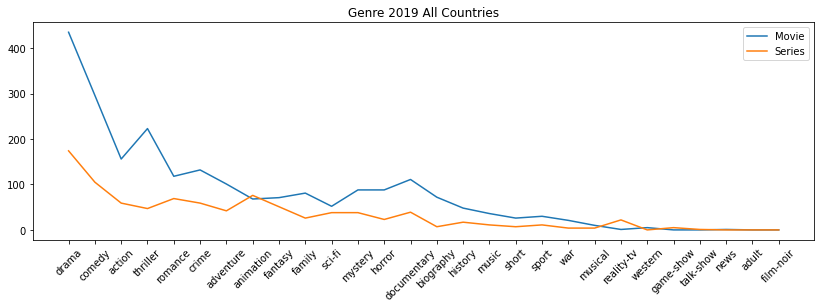

In [140]:
fig, ax = plt.subplots(figsize = (14,4))
ax.plot(genre_2019_df.columns, genre_2019_df.iloc[0,:], label="Movie")
ax.plot(genre_2019_df.columns, genre_2019_df.iloc[1,:], label="Series")
ax.tick_params(axis='x', labelrotation=45)
ax.set_title('Genre 2019 All Countries')
ax.legend()

# plt.savefig("../data/ppt_png/Genre 2019 All Countries", facecolor=(1,1,1,1), dpi=300, bbox_inches='tight', pad_inches=0.1)

<AxesSubplot:ylabel='Movie'>

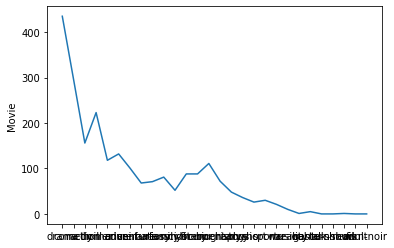

In [141]:
sns.lineplot(data=genre_2019_df.iloc[0,:])

- 2020 장르 변화

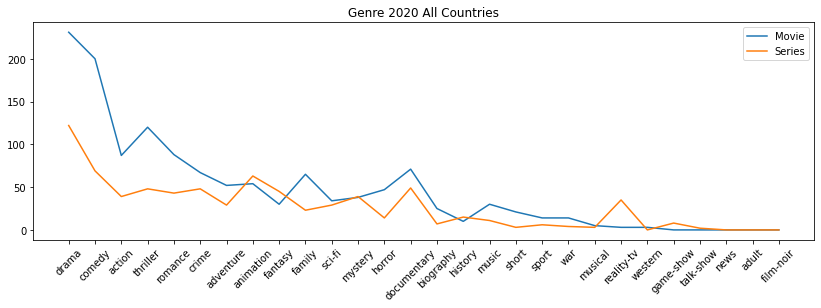

In [142]:
fig, ax = plt.subplots(figsize = (14,4))
ax.plot(genre_2020_df.columns, genre_2020_df.iloc[0,:], label="Movie")
ax.plot(genre_2020_df.columns, genre_2020_df.iloc[1,:], label="Series")
ax.tick_params(axis='x', labelrotation=45)
ax.set_title('Genre 2020 All Countries')
ax.legend()

# plt.savefig("../data/ppt_png/Genre 2020 All Countries", facecolor=(1,1,1,1), dpi=300, bbox_inches='tight', pad_inches=0.1)

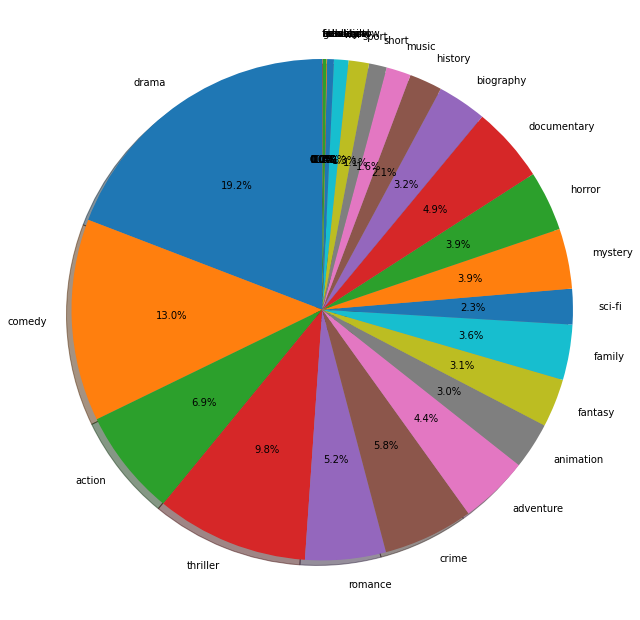

In [143]:
fig1, ax1 = plt.subplots(figsize = (9,9))
w,l,p = ax1.pie(genre_2019_df.iloc[0,:], labels=genre_2019_df.columns, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

for l_, p_ in zip(l, p):
    p_.set_rotation(l_.get_rotation())
plt.tight_layout()
plt.show()

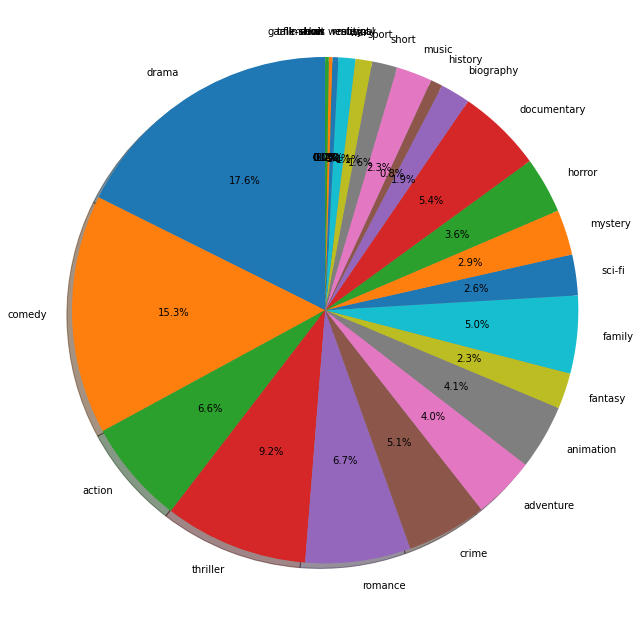

In [144]:
fig1, ax1 = plt.subplots(figsize = (9,9))
w,l,p = ax1.pie(genre_2020_df.iloc[0,:], labels=genre_2020_df.columns, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

for l_, p_ in zip(l, p):
    p_.set_rotation(l_.get_rotation())
plt.tight_layout()
plt.show()

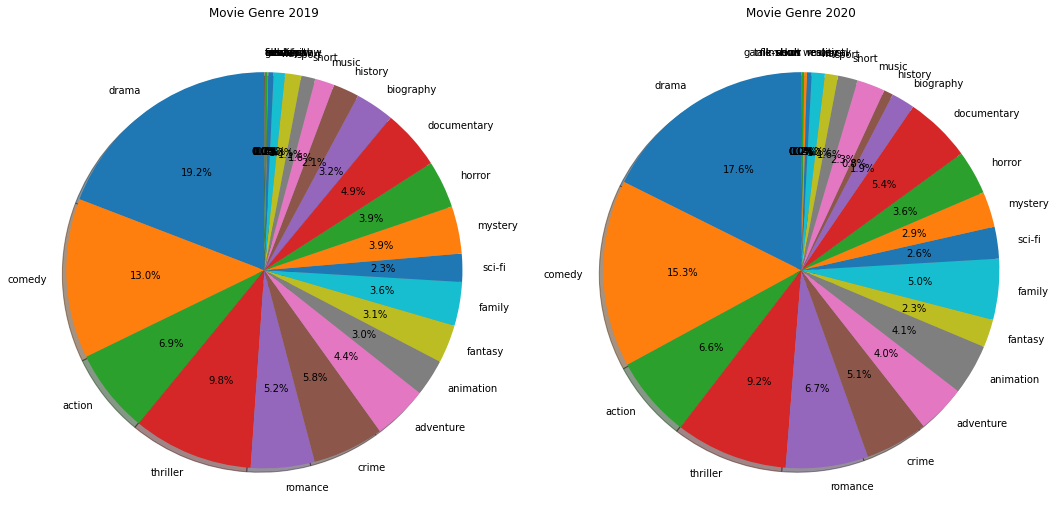

In [145]:
fig, axs = plt.subplots(1,2, figsize=(15, 8))
axs[0].pie(genre_2019_df.iloc[0,:], labels=genre_2019_df.columns, autopct='%1.1f%%',shadow=True, startangle=90)
axs[0].set_title("Movie Genre 2019")
axs[1].pie(genre_2020_df.iloc[0,:], labels=genre_2020_df.columns, autopct='%1.1f%%',shadow=True, startangle=90)
axs[1].set_title("Movie Genre 2020")

plt.tight_layout()
plt.show()

- rate of increase

In [146]:
genre_2019_df

,drama,comedy,action,thriller,romance,crime,adventure,animation,fantasy,family,sci-fi,mystery,horror,documentary,biography,history,music,short,sport,war,musical,reality-tv,western,game-show,talk-show,news,adult,film-noir
Series or Movies,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Movie,435,296,156,223,118,132,101,68,71,81,52,88,88,111,72,48,36,26,30,21,10,1,5,0,0,1,0,0
Series,174,105,59,47,69,59,42,76,51,26,38,38,23,39,7,17,11,7,11,4,4,22,0,5,1,0,0,0


In [147]:
genre_2020_df

,drama,comedy,action,thriller,romance,crime,adventure,animation,fantasy,family,sci-fi,mystery,horror,documentary,biography,history,music,short,sport,war,musical,reality-tv,western,game-show,talk-show,news,adult,film-noir
Series or Movies,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Movie,231,200,87,120,88,67,52,54,30,65,34,38,47,71,25,10,30,21,14,14,5,3,3,0,0,0,0,0
Series,122,69,39,48,43,48,29,63,45,23,29,39,14,49,7,15,11,3,6,4,3,35,0,8,2,0,0,0


In [148]:
genre_2019_df.head(1)

,drama,comedy,action,thriller,romance,crime,adventure,animation,fantasy,family,sci-fi,mystery,horror,documentary,biography,history,music,short,sport,war,musical,reality-tv,western,game-show,talk-show,news,adult,film-noir
Series or Movies,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Movie,435,296,156,223,118,132,101,68,71,81,52,88,88,111,72,48,36,26,30,21,10,1,5,0,0,1,0,0


In [149]:
merge_2019_2020_df = pd.concat([genre_2019_df.head(1), genre_2020_df.head(1)], axis=0)

In [150]:
merge_2019_2020_df.diff()


,drama,comedy,action,thriller,romance,crime,adventure,animation,fantasy,family,sci-fi,mystery,horror,documentary,biography,history,music,short,sport,war,musical,reality-tv,western,game-show,talk-show,news,adult,film-noir
Series or Movies,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Movie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Movie,-204.0,-96.0,-69.0,-103.0,-30.0,-65.0,-49.0,-14.0,-41.0,-16.0,-18.0,-50.0,-41.0,-40.0,-47.0,-38.0,-6.0,-5.0,-16.0,-7.0,-5.0,2.0,-2.0,0.0,0.0,-1.0,0.0,0.0


Text(0.5, 1.0, 'Genre Change 2019~2020 All Countries')

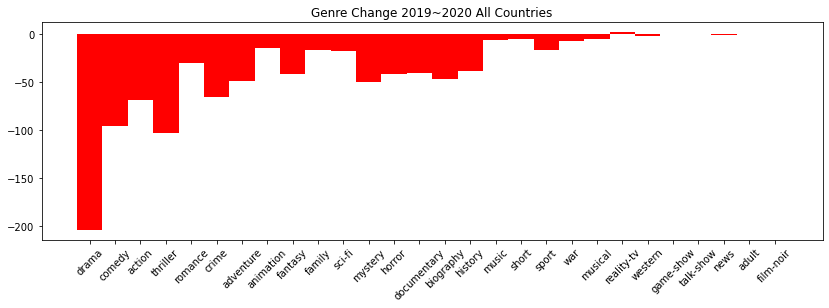

In [151]:
fig = plt.figure(figsize = (14,4))
ax = plt.subplot()
ax.tick_params(axis='x', labelrotation=45)
ax.bar(merge_2019_2020_df.diff().columns, merge_2019_2020_df.diff().iloc[1,:], width=1, color='r')
ax.set_title('Genre Change 2019~2020 All Countries')

In [152]:
merge_2019_2020_df.pct_change()

,drama,comedy,action,thriller,romance,crime,adventure,animation,fantasy,family,sci-fi,mystery,horror,documentary,biography,history,music,short,sport,war,musical,reality-tv,western,game-show,talk-show,news,adult,film-noir
Series or Movies,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Movie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Movie,-0.468966,-0.324324,-0.442308,-0.461883,-0.254237,-0.492424,-0.485149,-0.205882,-0.577465,-0.197531,-0.346154,-0.568182,-0.465909,-0.36036,-0.652778,-0.791667,-0.166667,-0.192308,-0.533333,-0.333333,-0.5,2.0,-0.4,NaN,NaN,-1.0,NaN,NaN


Text(0.5, 1.0, 'Genre Change Rate 2019~2020 All Countries')

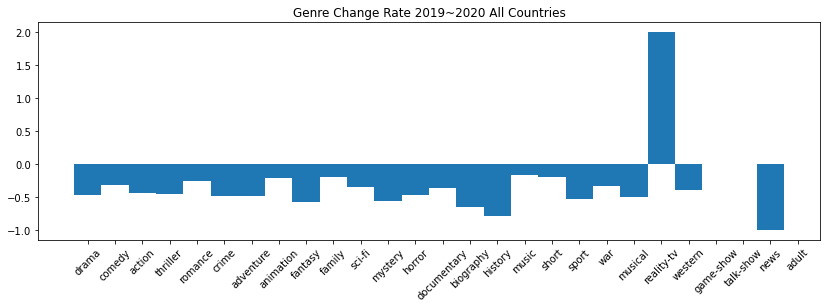

In [153]:
fig = plt.figure(figsize = (14,4))
ax = plt.subplot()
ax.tick_params(axis='x', labelrotation=45)
ax.bar(merge_2019_2020_df.pct_change().columns, merge_2019_2020_df.pct_change().iloc[1,:], width=1)
ax.set_title('Genre Change Rate 2019~2020 All Countries')

###  Genres by Series and Movie

In [154]:
genre_2020_df.head()

,drama,comedy,action,thriller,romance,crime,adventure,animation,fantasy,family,sci-fi,mystery,horror,documentary,biography,history,music,short,sport,war,musical,reality-tv,western,game-show,talk-show,news,adult,film-noir
Series or Movies,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Movie,231,200,87,120,88,67,52,54,30,65,34,38,47,71,25,10,30,21,14,14,5,3,3,0,0,0,0,0
Series,122,69,39,48,43,48,29,63,45,23,29,39,14,49,7,15,11,3,6,4,3,35,0,8,2,0,0,0


In [155]:
genre_2020_df.T

Series or Movies,Movie,Series
drama,231,122
comedy,200,69
action,87,39
thriller,120,48
romance,88,43
crime,67,48
adventure,52,29
animation,54,63
fantasy,30,45
family,65,23


In [156]:
genre_2019_df.T

Series or Movies,Movie,Series
drama,435,174
comedy,296,105
action,156,59
thriller,223,47
romance,118,69
crime,132,59
adventure,101,42
animation,68,76
fantasy,71,51
family,81,26


# Genre Change (2019 vs 2020) south korea

- genre_2019_k_df

In [157]:
genre_2019_k_df = to_use_k_df[(to_use_k_df['Release Date'] >  pd.Timestamp(2019,1,1)) & (to_use_k_df['Release Date'] < pd.Timestamp(2019,12,31))].groupby('Series or Movies').sum()
genre_2019_k_df

<ipython-input-157-1e52817e21c7>:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.add is deprecated. In a future version, a TypeError will be raised. Before calling .add, select only columns which should be valid for the function.
  genre_2019_k_df = to_use_k_df[(to_use_k_df['Release Date'] >  pd.Timestamp(2019,1,1)) & (to_use_k_df['Release Date'] < pd.Timestamp(2019,12,31))].groupby('Series or Movies').sum()


,Title,drama,comedy,action,thriller,romance,crime,adventure,animation,fantasy,family,sci-fi,mystery,horror,documentary,biography,history,music,short,sport,war,musical,reality-tv,western,game-show,talk-show,news,adult,film-noir
Series or Movies,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Movie,Promise at DawnStrayHomme FataleExtreme JobThe...,129,136,49,56,46,42,30,23,28,28,14,26,23,58,24,18,17,19,8,4,3,1,0,0,0,0,0,0
Series,Pinkfong & Hogi Dance DanceGraceful FamilySome...,113,69,27,31,36,43,28,39,24,21,24,23,15,30,5,12,6,5,6,3,3,19,0,5,1,0,0,0


- genre_2020_k_df

In [158]:
genre_2020_k_df = to_use_k_df[(to_use_k_df['Release Date'] >  pd.Timestamp(2020,1,1)) & (to_use_k_df['Release Date'] < pd.Timestamp(2020,12,31))].groupby('Series or Movies').sum()
genre_2020_k_df

<ipython-input-158-a1308c375531>:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.add is deprecated. In a future version, a TypeError will be raised. Before calling .add, select only columns which should be valid for the function.
  genre_2020_k_df = to_use_k_df[(to_use_k_df['Release Date'] >  pd.Timestamp(2020,1,1)) & (to_use_k_df['Release Date'] < pd.Timestamp(2020,12,31))].groupby('Series or Movies').sum()


,Title,drama,comedy,action,thriller,romance,crime,adventure,animation,fantasy,family,sci-fi,mystery,horror,documentary,biography,history,music,short,sport,war,musical,reality-tv,western,game-show,talk-show,news,adult,film-noir
Series or Movies,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Movie,MarionetteTea PetsCloverEnter the Fat DragonCo...,103,112,33,51,36,28,32,38,18,42,15,20,14,45,8,5,14,18,8,4,4,1,2,0,0,0,0,0
Series,The Netflix AfterpartyBest Leftovers Ever!Brid...,92,56,29,37,31,40,18,39,29,21,24,32,12,43,5,11,10,3,4,2,3,33,0,7,2,0,0,0


In [159]:
genre_2019_k_df.iloc[0,:]

Title          Promise at DawnStrayHomme FataleExtreme JobThe...
drama                                                        129
comedy                                                       136
action                                                        49
thriller                                                      56
romance                                                       46
crime                                                         42
adventure                                                     30
animation                                                     23
fantasy                                                       28
family                                                        28
sci-fi                                                        14
mystery                                                       26
horror                                                        23
documentary                                                   58
biography                

In [160]:
genre_2019_k_df

,Title,drama,comedy,action,thriller,romance,crime,adventure,animation,fantasy,family,sci-fi,mystery,horror,documentary,biography,history,music,short,sport,war,musical,reality-tv,western,game-show,talk-show,news,adult,film-noir
Series or Movies,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Movie,Promise at DawnStrayHomme FataleExtreme JobThe...,129,136,49,56,46,42,30,23,28,28,14,26,23,58,24,18,17,19,8,4,3,1,0,0,0,0,0,0
Series,Pinkfong & Hogi Dance DanceGraceful FamilySome...,113,69,27,31,36,43,28,39,24,21,24,23,15,30,5,12,6,5,6,3,3,19,0,5,1,0,0,0


In [161]:
genre_2020_k_df.columns[1:]

Index(['drama', 'comedy', 'action', 'thriller', 'romance', 'crime',
       'adventure', 'animation', 'fantasy', 'family', 'sci-fi', 'mystery',
       'horror', 'documentary', 'biography', 'history', 'music', 'short',
       'sport', 'war', 'musical', 'reality-tv', 'western', 'game-show',
       'talk-show', 'news', 'adult', 'film-noir'],
      dtype='object')

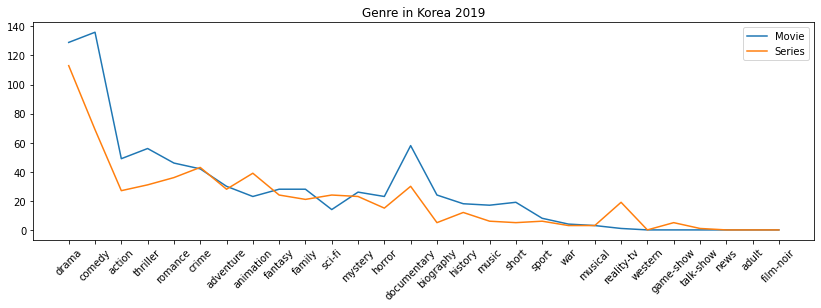

In [162]:
fig, ax = plt.subplots(figsize = (14,4))
ax.plot(genre_2019_k_df.columns[1:], genre_2019_k_df.iloc[0,1:], label="Movie")
ax.plot(genre_2019_k_df.columns[1:], genre_2019_k_df.iloc[1,1:], label="Series")
ax.tick_params(axis='x', labelrotation=45)
ax.set_title('Genre in Korea 2019')
ax.legend()

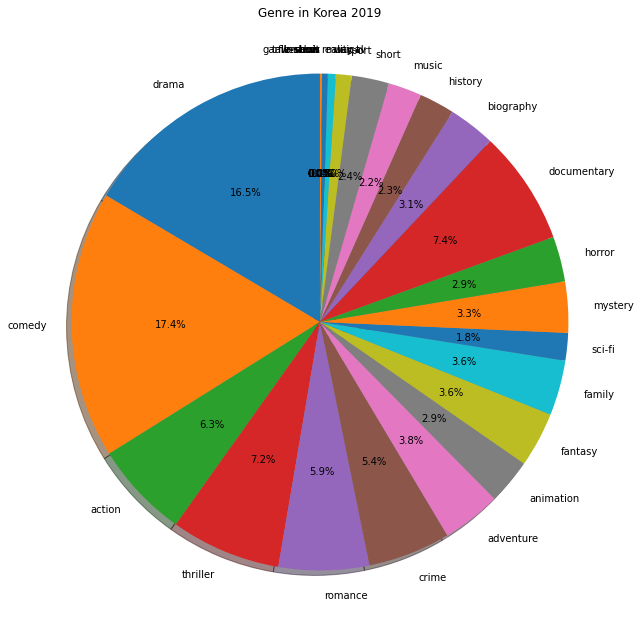

In [163]:
fig1, ax1 = plt.subplots(figsize = (9,9))
w,l,p = ax1.pie(genre_2019_k_df.iloc[0, 1:], labels=genre_2019_k_df.columns[1:], autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title('Genre in Korea 2019')
for l_, p_ in zip(l, p):
    p_.set_rotation(l_.get_rotation())
plt.tight_layout()
plt.show()

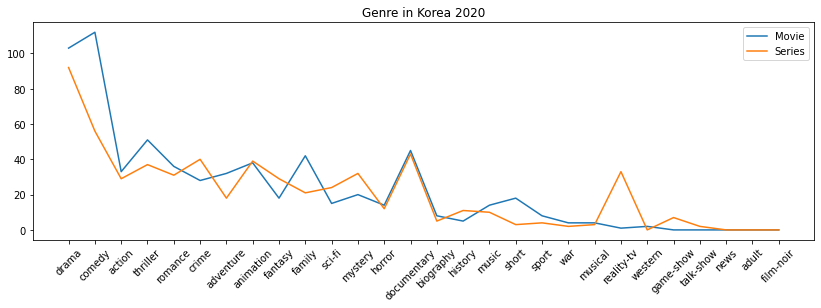

In [164]:
fig, ax = plt.subplots(figsize = (14,4))
ax.plot(genre_2020_k_df.columns[1:], genre_2020_k_df.iloc[0, 1:], label="Movie")
ax.plot(genre_2020_k_df.columns[1:], genre_2020_k_df.iloc[1, 1:], label="Series")
ax.tick_params(axis='x', labelrotation=45)
ax.set_title('Genre in Korea 2020')
ax.legend()

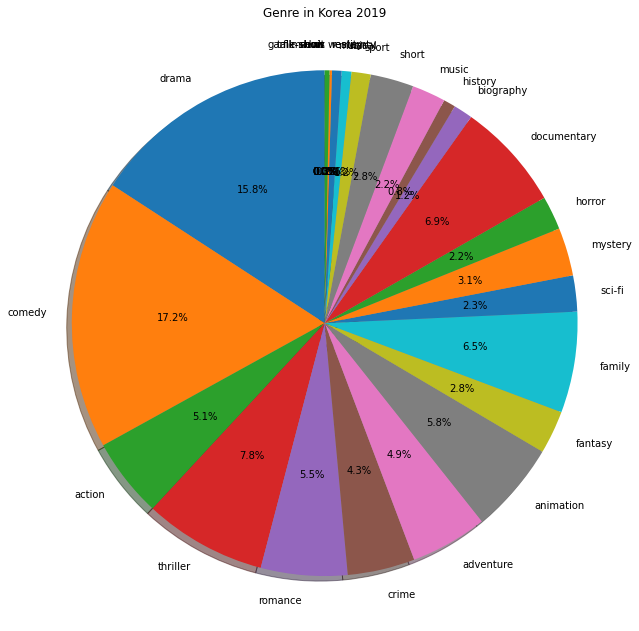

In [165]:
fig1, ax1 = plt.subplots(figsize = (9,9))
w,l,p = ax1.pie(genre_2020_k_df.iloc[0, 1:], labels=genre_2020_k_df.columns[1:], autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title('Genre in Korea 2019')
for l_, p_ in zip(l, p):
    p_.set_rotation(l_.get_rotation())
plt.tight_layout()
plt.show()

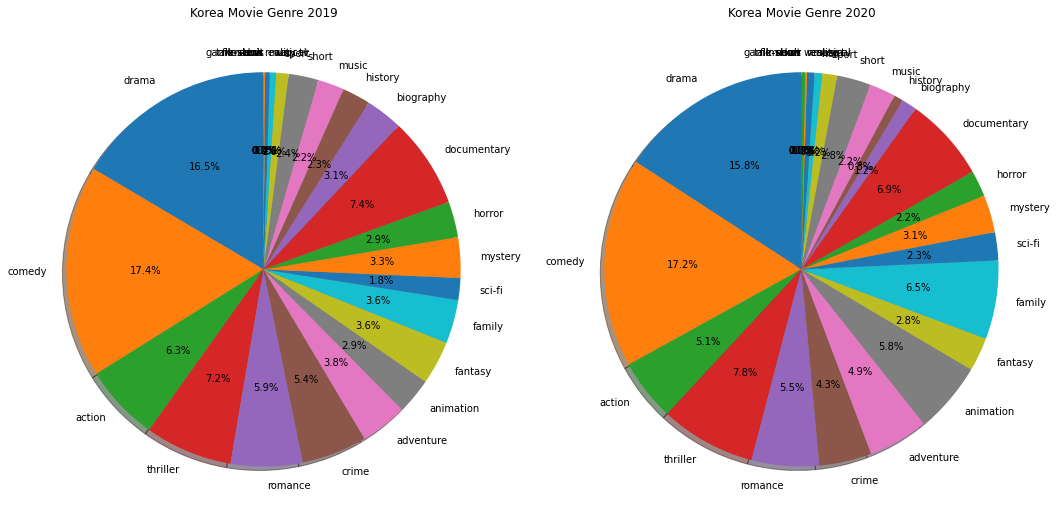

In [166]:
fig, axs = plt.subplots(1,2, figsize=(15, 8))
axs[0].pie(genre_2019_k_df.iloc[0, 1:], labels=genre_2019_k_df.columns[1:], autopct='%1.1f%%',shadow=True, startangle=90)
axs[0].set_title("Korea Movie Genre 2019")
axs[1].pie(genre_2020_k_df.iloc[0, 1:], labels=genre_2020_k_df.columns[1:], autopct='%1.1f%%',shadow=True, startangle=90)
axs[1].set_title("Korea Movie Genre 2020")

plt.tight_layout()
plt.show()

In [167]:
genre_2019_k_df.iloc[:, 1:]

,drama,comedy,action,thriller,romance,crime,adventure,animation,fantasy,family,sci-fi,mystery,horror,documentary,biography,history,music,short,sport,war,musical,reality-tv,western,game-show,talk-show,news,adult,film-noir
Series or Movies,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Movie,129,136,49,56,46,42,30,23,28,28,14,26,23,58,24,18,17,19,8,4,3,1,0,0,0,0,0,0
Series,113,69,27,31,36,43,28,39,24,21,24,23,15,30,5,12,6,5,6,3,3,19,0,5,1,0,0,0


#### Korea Movie

In [168]:
merge_2019_2020_k_df = pd.concat([genre_2019_k_df.iloc[:, 1:].head(1), genre_2020_k_df.iloc[:, 1:].head(1)], axis=0)

In [169]:
merge_2019_2020_k_df.diff()

,drama,comedy,action,thriller,romance,crime,adventure,animation,fantasy,family,sci-fi,mystery,horror,documentary,biography,history,music,short,sport,war,musical,reality-tv,western,game-show,talk-show,news,adult,film-noir
Series or Movies,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Movie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Movie,-26.0,-24.0,-16.0,-5.0,-10.0,-14.0,2.0,15.0,-10.0,14.0,1.0,-6.0,-9.0,-13.0,-16.0,-13.0,-3.0,-1.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0


Text(0.5, 1.0, 'Korea Movie Genre Change 2019~2020')

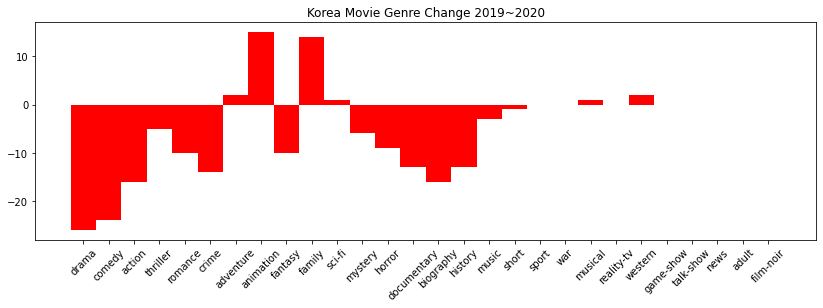

In [170]:
fig = plt.figure(figsize = (14,4))
ax = plt.subplot()
ax.tick_params(axis='x', labelrotation=45)
ax.bar(merge_2019_2020_k_df.diff().columns, merge_2019_2020_k_df.diff().iloc[1,:], width=1, color='r')
ax.set_title('Korea Movie Genre Change 2019~2020')

In [171]:
merge_2019_2020_k_df.pct_change()

,drama,comedy,action,thriller,romance,crime,adventure,animation,fantasy,family,sci-fi,mystery,horror,documentary,biography,history,music,short,sport,war,musical,reality-tv,western,game-show,talk-show,news,adult,film-noir
Series or Movies,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Movie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Movie,-0.20155,-0.176471,-0.326531,-0.089286,-0.217391,-0.333333,0.066667,0.652174,-0.357143,0.5,0.071429,-0.230769,-0.391304,-0.224138,-0.666667,-0.722222,-0.176471,-0.052632,0.0,0.0,0.333333,0.0,inf,NaN,NaN,NaN,NaN,NaN


Text(0.5, 1.0, 'Kore Movie Genre Change Rate 2019~2020')

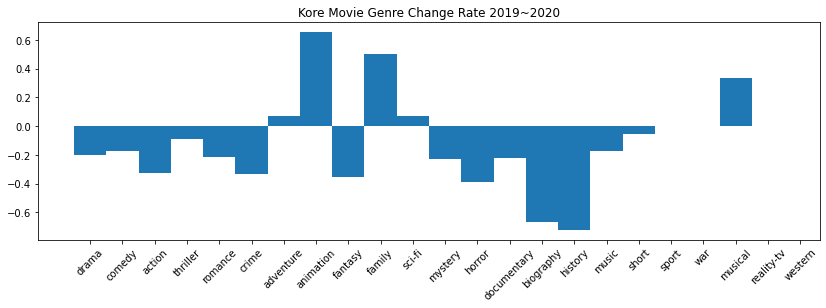

In [172]:
fig = plt.figure(figsize = (14,4))
ax = plt.subplot()
ax.tick_params(axis='x', labelrotation=45)
ax.bar(merge_2019_2020_k_df.pct_change().columns, merge_2019_2020_k_df.pct_change().iloc[1,:], width=1)
ax.set_title('Kore Movie Genre Change Rate 2019~2020')

#### Korea Series

In [173]:
genre_2019_k_df.iloc[1, 1:]

drama          113
comedy          69
action          27
thriller        31
romance         36
crime           43
adventure       28
animation       39
fantasy         24
family          21
sci-fi          24
mystery         23
horror          15
documentary     30
biography        5
history         12
music            6
short            5
sport            6
war              3
musical          3
reality-tv      19
western          0
game-show        5
talk-show        1
news             0
adult            0
film-noir        0
Name: Series, dtype: object

In [174]:
merge_2019_2020_ks_df = pd.concat([genre_2019_k_df.iloc[[1], 1:], genre_2020_k_df.iloc[[1], 1:]], axis=0)

In [175]:
merge_2019_2020_ks_df

,drama,comedy,action,thriller,romance,crime,adventure,animation,fantasy,family,sci-fi,mystery,horror,documentary,biography,history,music,short,sport,war,musical,reality-tv,western,game-show,talk-show,news,adult,film-noir
Series or Movies,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Series,113,69,27,31,36,43,28,39,24,21,24,23,15,30,5,12,6,5,6,3,3,19,0,5,1,0,0,0
Series,92,56,29,37,31,40,18,39,29,21,24,32,12,43,5,11,10,3,4,2,3,33,0,7,2,0,0,0


In [176]:
merge_2019_2020_ks_df.diff()

,drama,comedy,action,thriller,romance,crime,adventure,animation,fantasy,family,sci-fi,mystery,horror,documentary,biography,history,music,short,sport,war,musical,reality-tv,western,game-show,talk-show,news,adult,film-noir
Series or Movies,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Series,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Series,-21.0,-13.0,2.0,6.0,-5.0,-3.0,-10.0,0.0,5.0,0.0,0.0,9.0,-3.0,13.0,0.0,-1.0,4.0,-2.0,-2.0,-1.0,0.0,14.0,0.0,2.0,1.0,0.0,0.0,0.0


In [177]:
fig = plt.figure(figsize = (14,4))
ax = plt.subplot()
ax.tick_params(axis='x', labelrotation=45)
ax.bar(merge_2019_2020_ks_df.diff().columns, merge_2019_2020_ks_df.diff().iloc[1,:], width=1, color='pink')
ax.set_title('Korea Series Genre Change 2019~2020')

Text(0.5, 1.0, 'Korea Series Genre Change 2019~2020')

In [ ]:
merge_2019_2020_ks_df.pct_change()

,drama,comedy,action,thriller,romance,crime,adventure,animation,fantasy,family,...,sport,war,musical,reality-tv,western,game-show,talk-show,news,adult,film-noir
Series or Movies,,,,,,,,,,,,,,,,,,,,,
Series,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Series,-0.185841,-0.188406,0.074074,0.193548,-0.138889,-0.069767,-0.357143,0.0,0.208333,0.0,...,-0.333333,-0.333333,0.0,0.736842,NaN,0.4,1.0,NaN,NaN,NaN


Text(0.5, 1.0, 'Kore Series Change Rate 2019~2020')

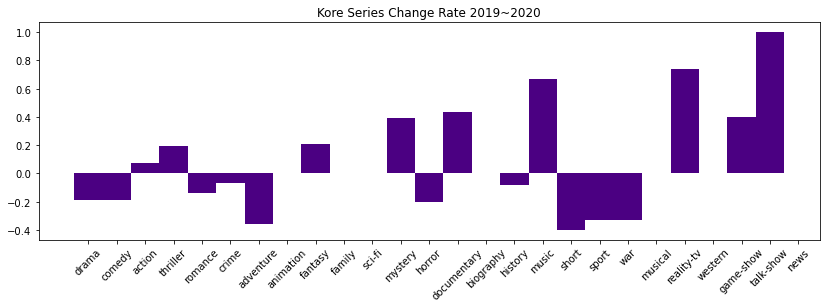

In [ ]:
fig = plt.figure(figsize = (14,4))
ax = plt.subplot()
ax.tick_params(axis='x', labelrotation=45)
ax.bar(merge_2019_2020_ks_df.pct_change().columns, merge_2019_2020_ks_df.pct_change().iloc[1,:], width=1, color='indigo')
ax.set_title('Kore Series Change Rate 2019~2020')

#  multiple plots by year & movie

In [ ]:
# Genre 2019 Korea without Title
genre_2019_k_wot_df = genre_2019_k_df.iloc[:, 1:]
genre_2020_k_wot_df = genre_2020_k_df.iloc[:, 1:]

In [ ]:
genre_2019_k_wot_df

,drama,comedy,action,thriller,romance,crime,adventure,animation,fantasy,family,...,sport,war,musical,reality-tv,western,game-show,talk-show,news,adult,film-noir
Series or Movies,,,,,,,,,,,,,,,,,,,,,
Movie,129,136,49,56,46,42,30,23,28,28,...,8,4,3,1,0,0,0,0,0,0
Series,113,69,27,31,36,43,28,39,24,21,...,6,3,3,19,0,5,1,0,0,0


In [ ]:
genre_2020_k_wot_df

,drama,comedy,action,thriller,romance,crime,adventure,animation,fantasy,family,...,sport,war,musical,reality-tv,western,game-show,talk-show,news,adult,film-noir
Series or Movies,,,,,,,,,,,,,,,,,,,,,
Movie,103,112,33,51,36,28,32,38,18,42,...,8,4,4,1,2,0,0,0,0,0
Series,92,56,29,37,31,40,18,39,29,21,...,4,2,3,33,0,7,2,0,0,0


In [ ]:
# Genre 2019 Korea without Title and essential columns
genre_2019_k_wot_es_df = genre_2019_k_wot_df.drop(['news', 'adult', 'film-noir'], axis=1)
genre_2020_k_wot_es_df = genre_2020_k_wot_df.drop(['news', 'adult', 'film-noir'], axis=1)

In [ ]:
genre_2019_k_wot_es_df

,drama,comedy,action,thriller,romance,crime,adventure,animation,fantasy,family,...,history,music,short,sport,war,musical,reality-tv,western,game-show,talk-show
Series or Movies,,,,,,,,,,,,,,,,,,,,,
Movie,129,136,49,56,46,42,30,23,28,28,...,18,17,19,8,4,3,1,0,0,0
Series,113,69,27,31,36,43,28,39,24,21,...,12,6,5,6,3,3,19,0,5,1


In [ ]:
genre_2019_k_wot_di_df = genre_2019_k_wot_df.reset_index()

### Plotting Netflix Korea # Genres of Series & Movie

In [ ]:
genre_2019_k_wot_es_df

,drama,comedy,action,thriller,romance,crime,adventure,animation,fantasy,family,...,history,music,short,sport,war,musical,reality-tv,western,game-show,talk-show
Series or Movies,,,,,,,,,,,,,,,,,,,,,
Movie,129,136,49,56,46,42,30,23,28,28,...,18,17,19,8,4,3,1,0,0,0
Series,113,69,27,31,36,43,28,39,24,21,...,12,6,5,6,3,3,19,0,5,1


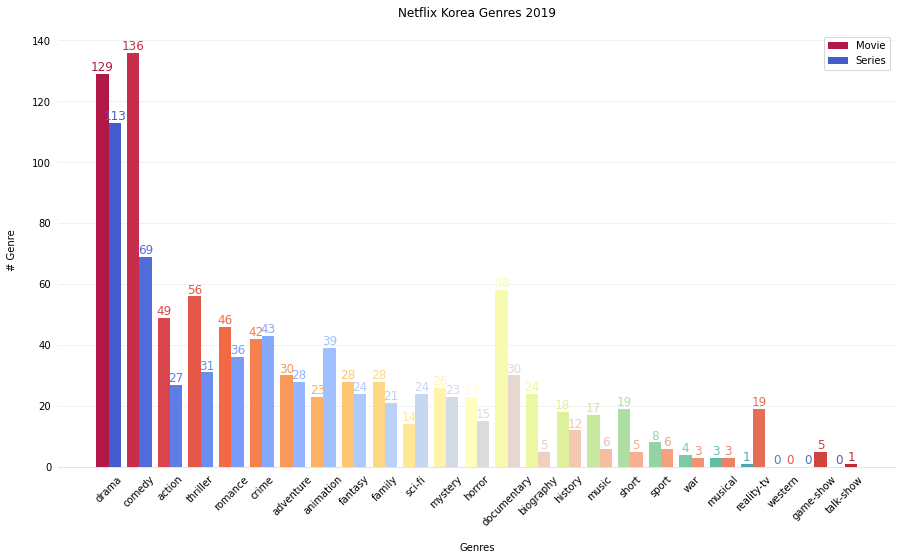

In [ ]:
fig, ax = plt.subplots(figsize=(15, 8))
x = np.arange(len(genre_2019_k_wot_es_df.columns))
bar_width = 0.8
color1 = sns.color_palette('Spectral',len(genre_2019_k_wot_es_df.columns))
color2 = sns.color_palette('coolwarm',len(genre_2019_k_wot_es_df.columns))
b1 = ax.bar(2*x, genre_2019_k_wot_es_df.iloc[0,:], width=bar_width, label='Movie', color=color1)
b2 = ax.bar(2*x + bar_width, genre_2019_k_wot_es_df.iloc[1,:], width=bar_width, label='Series', color=color2)
# b2 = ax.bar(x=genre_2019_k_wot_df.columns, y=genre_2019_k_wot_df.iloc[1,:].values)
ax.set_xticks(2*x + bar_width / 2)
ax.set_xticklabels(genre_2019_k_wot_es_df.columns)
ax.legend()

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

ax.set_xlabel('Genres', labelpad=15)
ax.set_ylabel('# Genre', labelpad=15)
ax.set_title('Netflix Korea Genres 2019', pad=15)
ax.tick_params(axis='x', labelrotation=45)
# plt.style.use(['seaborn-pastel'])
# https://www.pythoncharts.com/matplotlib/grouped-bar-charts-matplotlib/

for bar in ax.patches:
  # The text annotation for each bar should be its height.
  bar_value = bar.get_height()
  # Format the text with commas to separate thousands. You can do
  # any type of formatting here though.
  text = f'{bar_value:,}'
  # This will give the middle of each bar on the x-axis.
  text_x = bar.get_x() + bar.get_width() / 2
  # get_y() is where the bar starts so we add the height to it.
  text_y = bar.get_y() + bar_value
  # If we want the text to be the same color as the bar, we can
  # get the color like so:
  bar_color = bar.get_facecolor()
  # If you want a consistent color, you can just set it as a constant, e.g. #222222
  ax.text(text_x, text_y, text, ha='center', va='bottom', color=bar_color,
          size=12)
    
# plt.savefig("../data/ppt_png/Netflix Korea Genres 2019", facecolor=(1,1,1,1), dpi=300, bbox_inches='tight', pad_inches=0.1)


In [ ]:
genre_2020_k_wot_es_df.sum()

drama          195
comedy         168
action          62
thriller        88
romance         67
crime           68
adventure       50
animation       77
fantasy         47
family          63
sci-fi          39
mystery         52
horror          26
documentary     88
biography       13
history         16
music           24
short           21
sport           12
war              6
musical          7
reality-tv      34
western          2
game-show        7
talk-show        2
dtype: int64

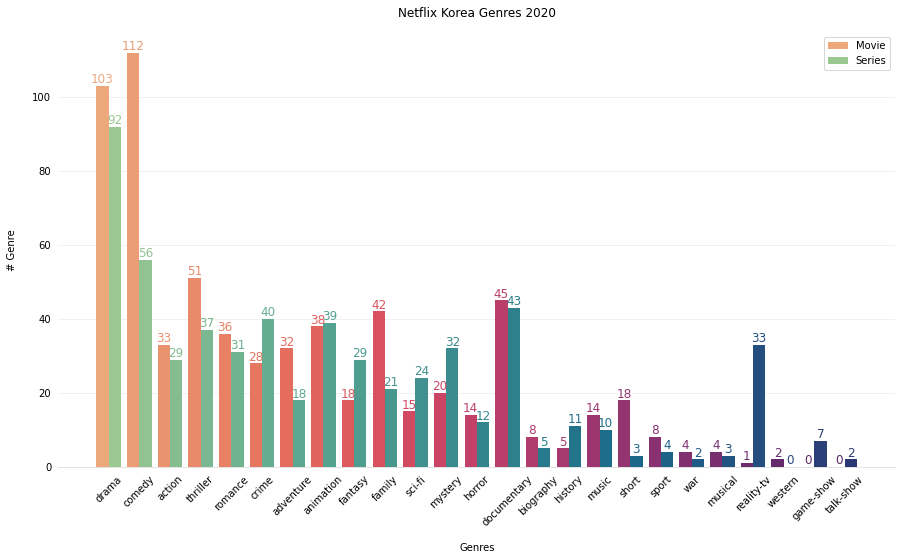

In [ ]:
fig, ax = plt.subplots(figsize=(15, 8))
x = np.arange(len(genre_2020_k_wot_es_df.columns))
bar_width = 0.8
color1 = sns.color_palette('flare',len(genre_2020_k_wot_es_df.columns))
color2 = sns.color_palette('crest',len(genre_2020_k_wot_es_df.columns))
b1 = ax.bar(2*x, genre_2020_k_wot_es_df.iloc[0,:], width=bar_width, label='Movie', color=color1)
b2 = ax.bar(2*x + bar_width, genre_2020_k_wot_es_df.iloc[1,:], width=bar_width, label='Series', color=color2)
# b2 = ax.bar(x=genre_2019_k_wot_df.columns, y=genre_2019_k_wot_df.iloc[1,:].values)
ax.set_xticks(2*x + bar_width / 2)
ax.set_xticklabels(genre_2020_k_wot_es_df.columns)
ax.legend()

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

ax.set_xlabel('Genres', labelpad=15)
ax.set_ylabel('# Genre', labelpad=15)
ax.set_title('Netflix Korea Genres 2020', pad=15)
ax.tick_params(axis='x', labelrotation=45)
# plt.style.use(['seaborn-pastel'])
# https://www.pythoncharts.com/matplotlib/grouped-bar-charts-matplotlib/

for bar in ax.patches:
  # The text annotation for each bar should be its height.
  bar_value = bar.get_height()
  # Format the text with commas to separate thousands. You can do
  # any type of formatting here though.
  text = f'{bar_value:,}'
  # This will give the middle of each bar on the x-axis.
  text_x = bar.get_x() + bar.get_width() / 2
  # get_y() is where the bar starts so we add the height to it.
  text_y = bar.get_y() + bar_value
  # If we want the text to be the same color as the bar, we can
  # get the color like so:
  bar_color = bar.get_facecolor()
  # If you want a consistent color, you can just set it as a constant, e.g. #222222
  ax.text(text_x, text_y, text, ha='center', va='bottom', color=bar_color,
          size=12)
    
# plt.savefig("../data/ppt_png/Netflix Korea Genres 2020", facecolor=(1,1,1,1), dpi=300, bbox_inches='tight', pad_inches=0.1)


### Plotting Netflix Korea Genre Changes between 2019 and 2020

In [ ]:
# Movie
merge_2019_2020_k2_df = merge_2019_2020_k_df.drop(['news', 'adult', 'film-noir'], axis=1)
merge_2019_2020_k2_df

,drama,comedy,action,thriller,romance,crime,adventure,animation,fantasy,family,...,history,music,short,sport,war,musical,reality-tv,western,game-show,talk-show
Series or Movies,,,,,,,,,,,,,,,,,,,,,
Movie,129,136,49,56,46,42,30,23,28,28,...,18,17,19,8,4,3,1,0,0,0
Movie,103,112,33,51,36,28,32,38,18,42,...,5,14,18,8,4,4,1,2,0,0


In [ ]:
# Series
merge_2019_2020_ks2_df = merge_2019_2020_ks_df.drop(['news', 'adult', 'film-noir'], axis=1)
merge_2019_2020_ks2_df.diff()

,drama,comedy,action,thriller,romance,crime,adventure,animation,fantasy,family,...,history,music,short,sport,war,musical,reality-tv,western,game-show,talk-show
Series or Movies,,,,,,,,,,,,,,,,,,,,,
Series,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Series,-21.0,-13.0,2.0,6.0,-5.0,-3.0,-10.0,0.0,5.0,0.0,...,-1.0,4.0,-2.0,-2.0,-1.0,0.0,14.0,0.0,2.0,1.0


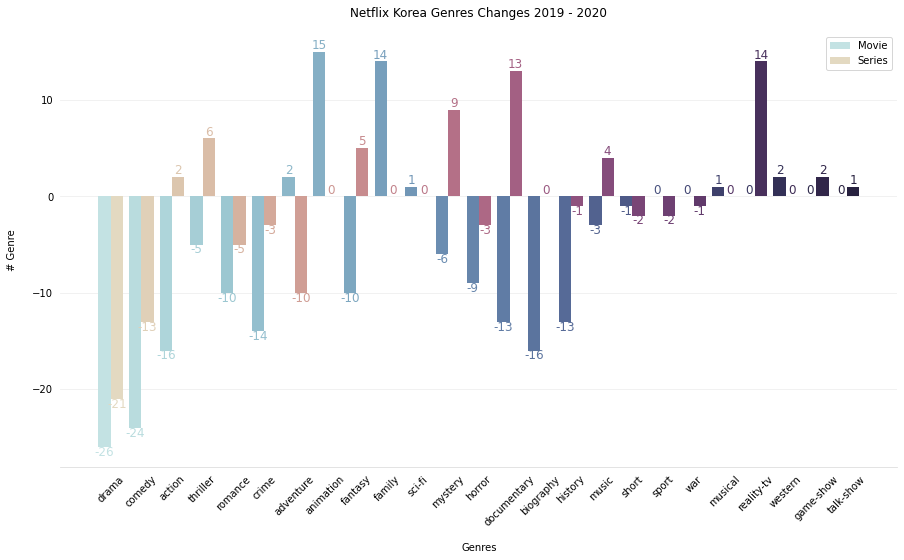

In [ ]:
fig, ax = plt.subplots(figsize=(15, 8))
x = np.arange(len(merge_2019_2020_ks2_df.columns))
bar_width = 0.8
label_offset = 1.2
color1 = sns.color_palette('ch:start=.2,rot=-.3',len(merge_2019_2020_ks2_df.columns))
color2 = sns.color_palette('ch:s=-.2,r=.6',len(merge_2019_2020_ks2_df.columns))
b1 = ax.bar(2*x, merge_2019_2020_k2_df.diff().iloc[1,:].astype(int), width=bar_width, label='Movie', color=color1)
b2 = ax.bar(2*x + bar_width, merge_2019_2020_ks2_df.diff().iloc[1,:].astype(int), width=bar_width, label='Series', color=color2)
# b2 = ax.bar(x=genre_2019_k_wot_df.columns, y=genre_2019_k_wot_df.iloc[1,:].values)
ax.set_xticks(2*x + bar_width / 2)
ax.set_xticklabels(merge_2019_2020_ks2_df.columns)
ax.legend()

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

ax.set_xlabel('Genres', labelpad=15)
ax.set_ylabel('# Genre', labelpad=15)
ax.set_title('Netflix Korea Genres Changes 2019 - 2020', pad=15)
ax.tick_params(axis='x', labelrotation=45)
# plt.style.use(['seaborn-pastel'])
# https://www.pythoncharts.com/matplotlib/grouped-bar-charts-matplotlib/

for bar in ax.patches:
  # The text annotation for each bar should be its height.
    bar_value = bar.get_height()
    # Format the text with commas to separate thousands. You can do
    # any type of formatting here though.
    if bar_value == 0:
        text = 0
    else:
        text = f'{bar_value:,}'
    # This will give the middle of each bar on the x-axis.
    text_x = bar.get_x() + bar.get_width() / 2
    # get_y() is where the bar starts so we add the height to it.
    if bar_value >= 0:
        text_y = bar_value
    else:
        text_y = bar_value - label_offset
    # If we want the text to be the same color as the bar, we can
    # get the color like so:
    bar_color = bar.get_facecolor()
    # If you want a consistent color, you can just set it as a constant, e.g. #222222
    ax.text(text_x, text_y, text, ha='center', va='bottom', color=bar_color,
          size=12)
    
# plt.savefig("../data/ppt_png/Netflix Korea Genres Changes 2019 - 2020", facecolor=(1,1,1,1), dpi=300, bbox_inches='tight', pad_inches=0.1)


### Netflix Korea Genres changes 2019 - 2020 with Styling

In [ ]:
to_translate_dict = {
    'drama':'드라마', 'comedy':'코미디', 'action':'액션', 'thriller':'스릴러', 'romance':'로맨스', 'crime':'범죄',
       'adventure':'모험', 'animation':'애니메이션', 'fantasy':'판타지', 'family':'가족', 'sci-fi':'SF', 'mystery':'미스터리',
       'horror':'공포', 'documentary':'다큐멘터리', 'biography':'전기', 'history':'역사', 'music':'음악', 'short':'단편',
       'sport':'스포츠', 'war':'전쟁', 'musical':'뮤지컬', 'reality-tv':'리얼리티', 'western':'서부', 'game-show':'게임쇼',
       'talk-show':'토크쇼'
}

In [ ]:
# Korea Series
translataed_merge_ks2_df = merge_2019_2020_ks2_df.copy().rename(columns = to_translate_dict)
translataed_merge_ks2_df

,드라마,코미디,액션,스릴러,로맨스,범죄,모험,애니메이션,판타지,가족,...,역사,음악,단편,스포츠,전쟁,뮤지컬,리얼리티,서부,게임쇼,토크쇼
Series or Movies,,,,,,,,,,,,,,,,,,,,,
Series,113,69,27,31,36,43,28,39,24,21,...,12,6,5,6,3,3,19,0,5,1
Series,92,56,29,37,31,40,18,39,29,21,...,11,10,3,4,2,3,33,0,7,2


In [ ]:
# Korea Movies
translataed_merge_k2_df = merge_2019_2020_k2_df.copy().rename(columns = to_translate_dict)
translataed_merge_k2_df

,드라마,코미디,액션,스릴러,로맨스,범죄,모험,애니메이션,판타지,가족,...,역사,음악,단편,스포츠,전쟁,뮤지컬,리얼리티,서부,게임쇼,토크쇼
Series or Movies,,,,,,,,,,,,,,,,,,,,,
Movie,129,136,49,56,46,42,30,23,28,28,...,18,17,19,8,4,3,1,0,0,0
Movie,103,112,33,51,36,28,32,38,18,42,...,5,14,18,8,4,4,1,2,0,0


C:\Users\Las\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 46300 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Las\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 46972 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Las\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 47560 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Las\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 53076 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Las\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 48120 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Las\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 46356 missing from current font.

C:\Users\Las\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 46300 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Las\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 46972 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Las\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 47560 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Las\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 53076 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Las\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 48120 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Las\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 46356 missing from current font.
  font.se

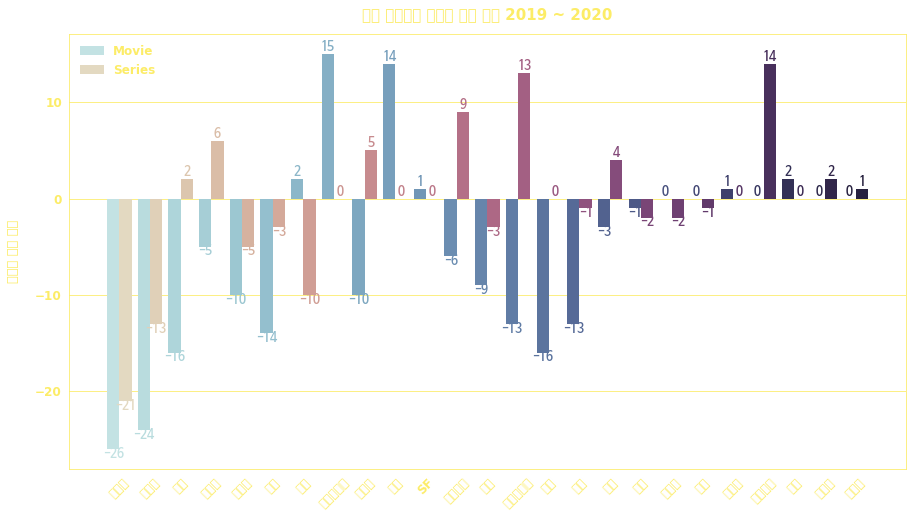

In [ ]:
font = {'weight':'bold', 'size':12}
plt.rc('font', **font)
color = '#FCEC67'


fig, ax = plt.subplots(figsize=(15, 8))

x = np.arange(len(merge_2019_2020_ks2_df.columns))
bar_width = 0.8
label_offset = 1.2
color1 = sns.color_palette('ch:start=.2,rot=-.3',len(translataed_merge_k2_df.columns))
color2 = sns.color_palette('ch:s=-.2,r=.6',len(translataed_merge_ks2_df.columns))
b1 = ax.bar(2*x, translataed_merge_k2_df.diff().iloc[1,:].astype(int), width=bar_width, label='Movie', color=color1)
b2 = ax.bar(2*x + bar_width, merge_2019_2020_ks2_df.diff().iloc[1,:].astype(int), width=bar_width, label='Series', color=color2)
# b2 = ax.bar(x=genre_2019_k_wot_df.columns, y=genre_2019_k_wot_df.iloc[1,:].values)
ax.set_xticks(2*x + bar_width / 2)
ax.set_xticklabels(translataed_merge_ks2_df.columns)
# legend
l = ax.legend(loc='upper left', edgecolor=color, frameon=False) # frameon : transparency
for text in l.get_texts():
    text.set_color(color)
        

# 테두리 색깔
ax.spines['top'].set_color(color)
ax.spines['bottom'].set_color(color)
ax.spines['left'].set_color(color)
ax.spines['right'].set_color(color)

ax.tick_params(colors=color)
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color=color)
ax.xaxis.grid(False)

# ax.set_xlabel('Genres', labelpad=15, weight='bold', fontsize=13, color=color)
ax.set_ylabel('컨텐츠 변화 개수', labelpad=15, weight='bold', fontsize=13, color=color)
ax.set_title('한국 넷플릭스 컨텐츠 장르 변화 2019 ~ 2020', pad=15, weight='bold', fontsize=15, color=color)
ax.tick_params(axis='x', labelrotation=45)
# plt.style.use(['seaborn-pastel'])
# https://www.pythoncharts.com/matplotlib/grouped-bar-charts-matplotlib/
plt.rc('font', family='NanumBarunGothic')
for bar in ax.patches:
  # The text annotation for each bar should be its height.
    bar_value = bar.get_height()
    # Format the text with commas to separate thousands. You can do
    # any type of formatting here though.
    if bar_value == 0:
        text = 0
    else:
        text = f'{bar_value:,}'
    # This will give the middle of each bar on the x-axis.
    text_x = bar.get_x() + bar.get_width() / 2
    # get_y() is where the bar starts so we add the height to it.
    if bar_value >= 0:
        text_y = bar_value
    else:
        text_y = bar_value - label_offset
    # If we want the text to be the same color as the bar, we can
    # get the color like so:
    bar_color = bar.get_facecolor()
    # If you want a consistent color, you can just set it as a constant, e.g. #222222
    ax.text(text_x, text_y, text, ha='center', va='bottom', color=bar_color,
          size=12)
    
# 그림의 배경까지 투명하게 transparent
# plt.savefig(f'../data/other_png/korea_netflix_genre_changes', dpi=300,
#             bbox_inches='tight', pad_inches=0.1, transparent=True) # , bbox_inches='tight'

### Plotting Netflix Korea Genre Rate of Changes between 2019 and 2020

In [ ]:
merge_2019_2020_k2_df

,drama,comedy,action,thriller,romance,crime,adventure,animation,fantasy,family,...,history,music,short,sport,war,musical,reality-tv,western,game-show,talk-show
Series or Movies,,,,,,,,,,,,,,,,,,,,,
Movie,129,136,49,56,46,42,30,23,28,28,...,18,17,19,8,4,3,1,0,0,0
Movie,103,112,33,51,36,28,32,38,18,42,...,5,14,18,8,4,4,1,2,0,0


In [ ]:
merge_2019_2020_ks2_df

,drama,comedy,action,thriller,romance,crime,adventure,animation,fantasy,family,...,history,music,short,sport,war,musical,reality-tv,western,game-show,talk-show
Series or Movies,,,,,,,,,,,,,,,,,,,,,
Series,113,69,27,31,36,43,28,39,24,21,...,12,6,5,6,3,3,19,0,5,1
Series,92,56,29,37,31,40,18,39,29,21,...,11,10,3,4,2,3,33,0,7,2


In [ ]:
merge_2019_2020_k2_df.pct_change()

,drama,comedy,action,thriller,romance,crime,adventure,animation,fantasy,family,...,history,music,short,sport,war,musical,reality-tv,western,game-show,talk-show
Series or Movies,,,,,,,,,,,,,,,,,,,,,
Movie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Movie,-0.20155,-0.176471,-0.326531,-0.089286,-0.217391,-0.333333,0.066667,0.652174,-0.357143,0.5,...,-0.722222,-0.176471,-0.052632,0.0,0.0,0.333333,0.0,inf,NaN,NaN


In [ ]:
merge_2019_2020_k2_rounded_df = merge_2019_2020_k2_df.pct_change().iloc[[1],:].apply(lambda x: round(*x.values.tolist(),2) * 100)
merge_2019_2020_ks2_rounded_df = merge_2019_2020_ks2_df.pct_change().iloc[[1],:].apply(lambda x: round(*x.values.tolist(),2) * 100)

In [ ]:
merge_2019_2020_k2_rounded_df

drama         -20.0
comedy        -18.0
action        -33.0
thriller       -9.0
romance       -22.0
crime         -33.0
adventure       7.0
animation      65.0
fantasy       -36.0
family         50.0
sci-fi          7.0
mystery       -23.0
horror        -39.0
documentary   -22.0
biography     -67.0
history       -72.0
music         -18.0
short          -5.0
sport           0.0
war             0.0
musical        33.0
reality-tv      0.0
western         inf
game-show       NaN
talk-show       NaN
dtype: float64

In [ ]:
merge_2019_2020_ks2_rounded_df

drama          -19.0
comedy         -19.0
action           7.0
thriller        19.0
romance        -14.0
crime           -7.0
adventure      -36.0
animation        0.0
fantasy         21.0
family           0.0
sci-fi           0.0
mystery         39.0
horror         -20.0
documentary     43.0
biography        0.0
history         -8.0
music           67.0
short          -40.0
sport          -33.0
war            -33.0
musical          0.0
reality-tv      74.0
western          NaN
game-show       40.0
talk-show      100.0
dtype: float64

In [ ]:
print(merge_2019_2020_k2_df.pct_change().iloc[1, -1], type(merge_2019_2020_k2_df.pct_change().iloc[1, -1]))
print(merge_2019_2020_k2_df.pct_change().iloc[1, -3], type(merge_2019_2020_k2_df.pct_change().iloc[1, -3]))

nan <class 'numpy.float64'>
inf <class 'numpy.float64'>


C:\Users\Las\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Las\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


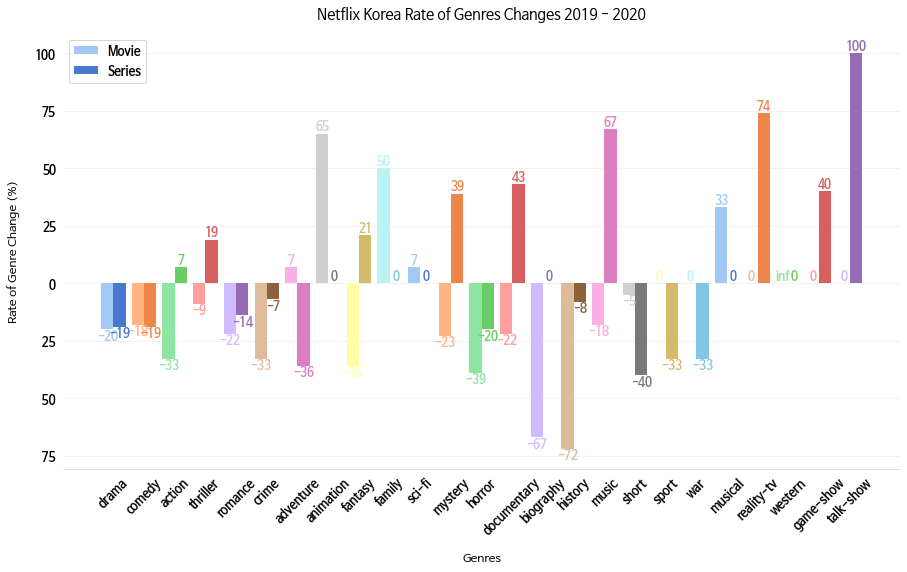

In [ ]:
fig, ax = plt.subplots(figsize=(15, 8))
x = np.arange(len(merge_2019_2020_ks2_df.columns))
bar_width = 0.8
label_offset = 6
color1 = sns.color_palette('pastel',len(merge_2019_2020_ks2_df.columns))
color2 = sns.color_palette('muted',len(merge_2019_2020_ks2_df.columns))
b1 = ax.bar(2*x, merge_2019_2020_k2_rounded_df, width=bar_width, label='Movie', color=color1)
b2 = ax.bar(2*x + bar_width, merge_2019_2020_ks2_rounded_df, width=bar_width, label='Series', color=color2)
# b2 = ax.bar(x=genre_2019_k_wot_df.columns, y=genre_2019_k_wot_df.iloc[1,:].values)
ax.set_xticks(2*x + bar_width / 2)
ax.set_xticklabels(merge_2019_2020_ks2_df.columns)
ax.legend()

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

ax.set_xlabel('Genres', labelpad=15)
ax.set_ylabel('Rate of Genre Change (%)', labelpad=15)
ax.set_title('Netflix Korea Rate of Genres Changes 2019 - 2020', pad=15)
ax.tick_params(axis='x', labelrotation=45)
# plt.style.use(['seaborn-pastel'])
# https://www.pythoncharts.com/matplotlib/grouped-bar-charts-matplotlib/

for bar in ax.patches:
  # The text annotation for each bar should be its height.
    bar_value = bar.get_height()
    # Format the text with commas to separate thousands. You can do
    # any type of formatting here though.
    if bar_value == 0:
        text = 0
        text_y = 0.0
    elif np.isinf(bar_value):
        text = 'inf'
        text_y = 0.0
    elif np.isnan(bar_value):
        text = 0
        text_y = 0.0
    elif bar_value > 0:
        text = f'{int(bar_value):,}'
        text_y = bar_value
    elif bar_value < 0:
        text = f'{int(bar_value):,}'
        text_y = bar_value - label_offset
    else:
        print('something is wrong')
    # This will give the middle of each bar on the x-axis.
    text_x = bar.get_x() + bar.get_width() / 2
    # If we want the text to be the same color as the bar, we can
    # get the color like so:
    bar_color = bar.get_facecolor()
    # If you want a consistent color, you can just set it as a constant, e.g. #222222
    ax.text(text_x, text_y, text, ha='center', va='bottom', color=bar_color,
          size=12)
    
# plt.savefig("../data/ppt_png/Netflix Korea Rate of Genres Changes 2019 - 2020", facecolor=(1,1,1,1), dpi=300, bbox_inches='tight', pad_inches=0.1)

Text(0.5, 1.0, 'Rate of Genre Chages')

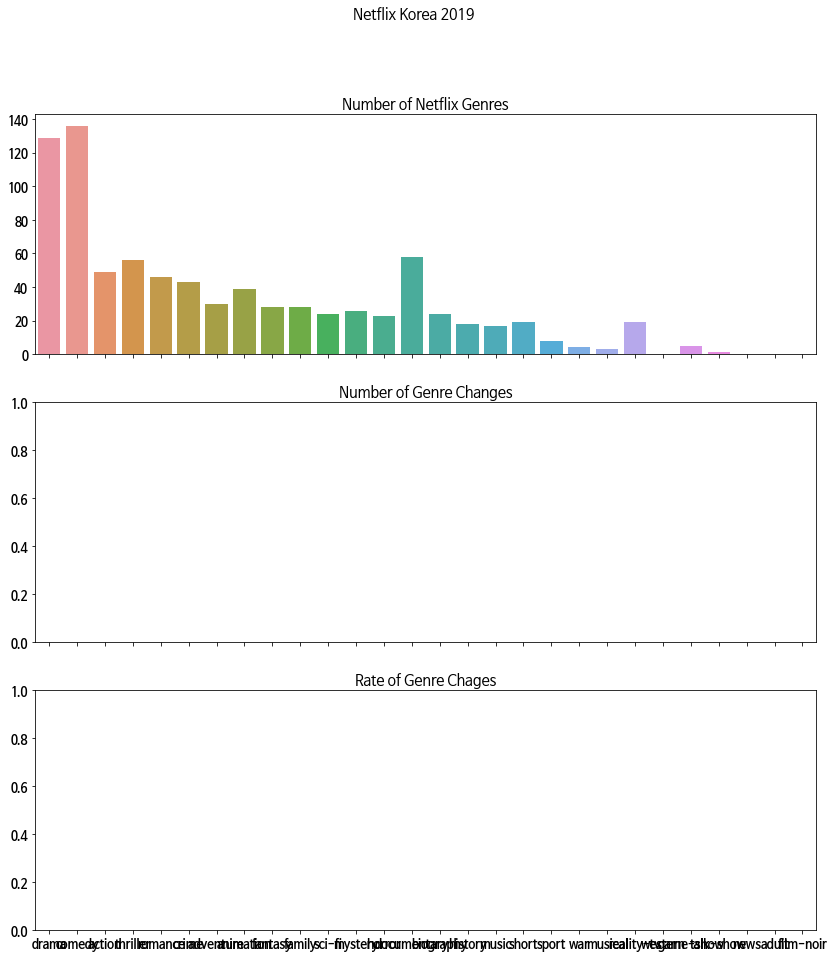

In [ ]:
fig, axes = plt.subplots(3, 1, sharex=True, figsize=(14, 15))
fig.suptitle('Netflix Korea 2019')
b1 = sns.barplot(ax=axes[0], x=genre_2019_k_wot_df.columns, y=genre_2019_k_wot_df.iloc[0,:].values)
b2 = sns.barplot(ax=axes[0], x=genre_2019_k_wot_df.columns, y=genre_2019_k_wot_df.iloc[1,:].values)
axes[0].set_title('Number of Netflix Genres')
axes[1].set_title('Number of Genre Changes')
axes[2].set_title('Rate of Genre Chages')

# Title for Crawling

In [ ]:
to_use_k_df.head()

,Title,Release Date,Series or Movies,drama,comedy,action,thriller,romance,crime,adventure,...,sport,war,musical,reality-tv,western,game-show,talk-show,news,adult,film-noir
4,Moxie,2011-09-22,Movie,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27,Comrades Almost a Love Story,1996-11-02,Movie,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
28,The Closet,2001-08-10,Movie,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
53,The Bold Type,2017-06-20,Series,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
55,Lobster Cop,2018-06-22,Movie,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
movie_title_crawling_bf_reg_list = to_use_k_df['Title'].values.tolist()

In [ ]:
movie_title_crawling_list = []
for i in movie_title_crawling_bf_reg_list:
    text = re.sub('[^a-zA-Z0-9가-힣]','',i).strip().lower()
    movie_title_crawling_list.append(text)

In [ ]:
movie_title_crawling_list

['moxie',
 'comradesalmostalovestory',
 'thecloset',
 'theboldtype',
 'lobstercop',
 'magichour',
 'marionette',
 'missbaek',
 'oldmarineboy',
 'ordinarypeople',
 'outdoorbegins',
 'pathsofthesoul',
 'promiseatdawn',
 'rebelintherye',
 'thereturn',
 'therookies',
 'snatchup',
 'stray',
 'standbyme',
 'teapets',
 'atigerinwinter',
 'thethreelittlepigs',
 'wonderstruck',
 'keystotheheart',
 'intimatestrangers',
 'hommefatale',
 'happybusday',
 'gonjiamhauntedasylum',
 'goldenslumber',
 'extremejob',
 'default',
 'criticsized',
 'communicationlies',
 'clover',
 'bloodorange',
 'thebigshot',
 'angelstime',
 'aftermydeath',
 'theageofblood',
 'theaccidentaldetective2inaction',
 '12feetdeep',
 '1987whenthedaycomes',
 'enterthefatdragon',
 'thegirlonthetrain',
 'madeyoulookatruestoryaboutfakeart',
 'chihayafuru',
 'classmatesminus',
 'sisyphus',
 'behindhereyes',
 'themansonfamilymassacre',
 'returnofthekinghuangfeihong',
 'tenyearsjapan',
 'loveatsecondsight',
 'liberation',
 'thekingisinvin

In [ ]:
# to use korea with title for crawling df
to_use_k_w_tfc_df = to_use_k_df.copy()
to_use_k_w_tfc_df['Title for Crawling'] = movie_title_crawling_list

- Dropping Worthless Columns

In [ ]:
to_use_k_w_tfc_df = to_use_k_w_tfc_df.drop(['news', 'adult', 'film-noir'], axis=1)

In [ ]:
to_use_k_w_tfc_df

,Title,Release Date,Series or Movies,drama,comedy,action,thriller,romance,crime,adventure,...,music,short,sport,war,musical,reality-tv,western,game-show,talk-show,Title for Crawling
4,Moxie,2011-09-22,Movie,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,moxie
27,Comrades Almost a Love Story,1996-11-02,Movie,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,comradesalmostalovestory
28,The Closet,2001-08-10,Movie,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,thecloset
53,The Bold Type,2017-06-20,Series,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,theboldtype
55,Lobster Cop,2018-06-22,Movie,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,lobstercop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15475,K-POP Extreme Survival,NaT,Series,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,kpopextremesurvival
15476,DreamWorks Shreks Swamp Stories,NaT,Series,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,dreamworksshreksswampstories
15477,DreamWorks Happy Holidays from Madagascar,NaT,Series,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,dreamworkshappyholidaysfrommadagascar
15478,DreamWorks Holiday Classics,NaT,Series,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,dreamworksholidayclassics


In [ ]:
to_use_k_w_tfc_df[to_use_k_w_tfc_df['Series or Movies']=='Series'].head(10)

,Title,Release Date,Series or Movies,drama,comedy,action,thriller,romance,crime,adventure,...,music,short,sport,war,musical,reality-tv,western,game-show,talk-show,Title for Crawling
53,The Bold Type,2017-06-20,Series,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,theboldtype
112,Chihayafuru,2011-10-05,Series,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,chihayafuru
125,Sisyphus,1974-10-01,Series,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,sisyphus
127,Behind Her Eyes,2018-05-15,Series,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,behindhereyes
146,The Crew,2000-08-25,Series,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,thecrew
158,New Amsterdam,2018-09-25,Series,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,newamsterdam
160,The Big Day,2005-03-18,Series,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,thebigday
167,Capitani,2021-02-11,Series,1,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,capitani
189,Dont be the First one,2006-10-20,Series,0,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,dontbethefirstone
194,Invisible City,2009-05-02,Series,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,invisiblecity


- Getting Korean Movies from the column TItle for Crawling

In [ ]:
print(to_use_k_w_tfc_df.shape)
to_use_k_w_tfc_df[to_use_k_w_tfc_df['Series or Movies']=='Movie'].head()

(4845, 29)


,Title,Release Date,Series or Movies,drama,comedy,action,thriller,romance,crime,adventure,...,music,short,sport,war,musical,reality-tv,western,game-show,talk-show,Title for Crawling
4,Moxie,2011-09-22,Movie,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,moxie
27,Comrades Almost a Love Story,1996-11-02,Movie,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,comradesalmostalovestory
28,The Closet,2001-08-10,Movie,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,thecloset
55,Lobster Cop,2018-06-22,Movie,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,lobstercop
56,Magic hour,NaT,Movie,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,magichour


In [ ]:
to_use_k_w_tfc_df.isna().sum()

Title                   0
Release Date          411
Series or Movies        0
drama                   0
comedy                  0
action                  0
thriller                0
romance                 0
crime                   0
adventure               0
animation               0
fantasy                 0
family                  0
sci-fi                  0
mystery                 0
horror                  0
documentary             0
biography               0
history                 0
music                   0
short                   0
sport                   0
war                     0
musical                 0
reality-tv              0
western                 0
game-show               0
talk-show               0
Title for Crawling      0
dtype: int64

In [ ]:
to_use_k_w_tfc_df.sum()

C:\Users\Las\AppData\Local\Temp/ipykernel_21764/3015415363.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  to_use_k_w_tfc_df.sum()


Title                 MoxieComrades  Almost a Love StoryThe ClosetTh...
Series or Movies      MovieMovieMovieSeriesMovieMovieMovieMovieMovie...
drama                                                              2020
comedy                                                             1610
action                                                              923
thriller                                                            863
romance                                                             742
crime                                                               639
adventure                                                           618
animation                                                           622
fantasy                                                             573
family                                                              461
sci-fi                                                              416
mystery                                                         

In [ ]:
korean_movie_title_for_crawling_list = to_use_k_w_tfc_df[to_use_k_w_tfc_df['Series or Movies']=='Movie']['Title for Crawling'].values.tolist()
print(len(korean_movie_title_for_crawling_list))
korean_movie_title_for_crawling_list

3075


['moxie',
 'comradesalmostalovestory',
 'thecloset',
 'lobstercop',
 'magichour',
 'marionette',
 'missbaek',
 'oldmarineboy',
 'ordinarypeople',
 'outdoorbegins',
 'pathsofthesoul',
 'promiseatdawn',
 'rebelintherye',
 'thereturn',
 'therookies',
 'snatchup',
 'stray',
 'standbyme',
 'teapets',
 'atigerinwinter',
 'thethreelittlepigs',
 'wonderstruck',
 'keystotheheart',
 'intimatestrangers',
 'hommefatale',
 'happybusday',
 'gonjiamhauntedasylum',
 'goldenslumber',
 'extremejob',
 'default',
 'criticsized',
 'communicationlies',
 'clover',
 'bloodorange',
 'thebigshot',
 'angelstime',
 'aftermydeath',
 'theageofblood',
 'theaccidentaldetective2inaction',
 '12feetdeep',
 '1987whenthedaycomes',
 'enterthefatdragon',
 'thegirlonthetrain',
 'madeyoulookatruestoryaboutfakeart',
 'classmatesminus',
 'themansonfamilymassacre',
 'returnofthekinghuangfeihong',
 'tenyearsjapan',
 'loveatsecondsight',
 'liberation',
 'thekingisinvincible',
 'amanda',
 'corpuschristi',
 'thephotograph',
 'romang

####  Creating a csv File

In [ ]:
# to_use_k_w_tfc_df.to_csv('../data/korea_netflix.csv', sep=',', encoding='utf-8-sig')

In [ ]:
new_merged_w_img_df = pd.merge(to_use_k_w_tfc_df, df[['Image']], how='left', left_index=True, right_index=True)

In [ ]:
new_merged_w_img_df

,Title,Release Date,Series or Movies,drama,comedy,action,thriller,romance,crime,adventure,...,short,sport,war,musical,reality-tv,western,game-show,talk-show,Title for Crawling,Image
4,Moxie,2011-09-22,Movie,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,moxie,https://occ-0-4039-1500.1.nflxso.net/dnm/api/v...
27,Comrades Almost a Love Story,1996-11-02,Movie,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,comradesalmostalovestory,https://occ-0-395-988.1.nflxso.net/dnm/api/v6/...
28,The Closet,2001-08-10,Movie,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,thecloset,https://occ-0-395-988.1.nflxso.net/dnm/api/v6/...
53,The Bold Type,2017-06-20,Series,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,theboldtype,https://occ-0-768-769.1.nflxso.net/dnm/api/v6/...
55,Lobster Cop,2018-06-22,Movie,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,lobstercop,https://occ-0-1361-988.1.nflxso.net/dnm/api/v6...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15475,K-POP Extreme Survival,NaT,Series,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,kpopextremesurvival,https://occ-0-2851-38.1.nflxso.net/dnm/api/v6/...
15476,DreamWorks Shreks Swamp Stories,NaT,Series,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,dreamworksshreksswampstories,https://occ-0-2851-38.1.nflxso.net/dnm/api/v6/...
15477,DreamWorks Happy Holidays from Madagascar,NaT,Series,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,dreamworkshappyholidaysfrommadagascar,https://occ-0-2773-2774.1.nflxso.net/dnm/api/v...
15478,DreamWorks Holiday Classics,NaT,Series,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,dreamworksholidayclassics,https://occ-0-2851-38.1.nflxso.net/dnm/api/v6/...


In [ ]:
new_merged_w_img_df.iloc[0,-1]

'https://occ-0-4039-1500.1.nflxso.net/dnm/api/v6/evlCitJPPCVCry0BZlEFb5-QjKc/AAAABb72YCHDSHzrB8i5_iG56UFm-qV2bslRyMHIqZ4tmlIpeVtMsqAyUem6JAxXtV4Ec9jlA4EpTdf5tNX2ivyLUwmPy4d3xowFdJE63MPXbWu8kAnc-j9qhAZrmMI.jpg?r=fad'

In [ ]:
# new_merged_w_img_df.to_csv('../data/korea_netflix_modified.csv', sep=',', encoding='utf-8-sig')